# Compare vaccination strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']

strategies = [
    ('equal', EPIDEMIC['ws_vacc'], 'Pop only'),
    ('no_vacc', EPIDEMIC['ws_vacc'], 'No vaccination'),
    ('thl', EPIDEMIC['ws_vacc'], 'Pop, Inf and Hosp'),
    ('thl', [1/2, 1/2, 0], 'Pop and Hosp'),
    ('thl', [1/2, 0, 1/2], 'Pop and Inf'),
    ('thl', [0, 1/2, 1/2], 'Hosp and Inf'),
    ('thl', [0, 1, 0], 'Hosp only'),
    ('thl', [0, 0, 1], 'Inf only'),
]

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=True,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0)

Finished R: 1.0. 1/4. Policy: Pop only. 1/8
Finished R: 1.0. 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. 1/4. Policy: Pop and Hosp. 4/8
Finished R: 1.0. 1/4. Policy: Pop and Inf. 5/8
Finished R: 1.0. 1/4. Policy: Hosp and Inf. 6/8
Finished R: 1.0. 1/4. Policy: Hosp only. 7/8
Finished R: 1.0. 1/4. Policy: Inf only. 8/8
Finished R: 1.25. 2/4. Policy: Pop only. 1/8
Finished R: 1.25. 2/4. Policy: No vaccination. 2/8
Finished R: 1.25. 2/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.25. 2/4. Policy: Pop and Hosp. 4/8
Finished R: 1.25. 2/4. Policy: Pop and Inf. 5/8
Finished R: 1.25. 2/4. Policy: Hosp and Inf. 6/8
Finished R: 1.25. 2/4. Policy: Hosp only. 7/8
Finished R: 1.25. 2/4. Policy: Inf only. 8/8
Finished R: 1.5. 3/4. Policy: Pop only. 1/8
Finished R: 1.5. 3/4. Policy: No vaccination. 2/8
Finished R: 1.5. 3/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.5. 3/4. Policy: Pop and Hosp. 4/8
Finished R: 1.5. 3/4. Policy: Pop and I

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop and Inf: 84.82342402597173
Pop, Inf and Hosp: 84.82968634985083
Pop and Hosp: 84.8539386482398
Inf only: 84.88169292883346
Hosp and Inf: 84.89038340950167
Hosp only: 84.91834119789408
Pop only: 85.00249819210441


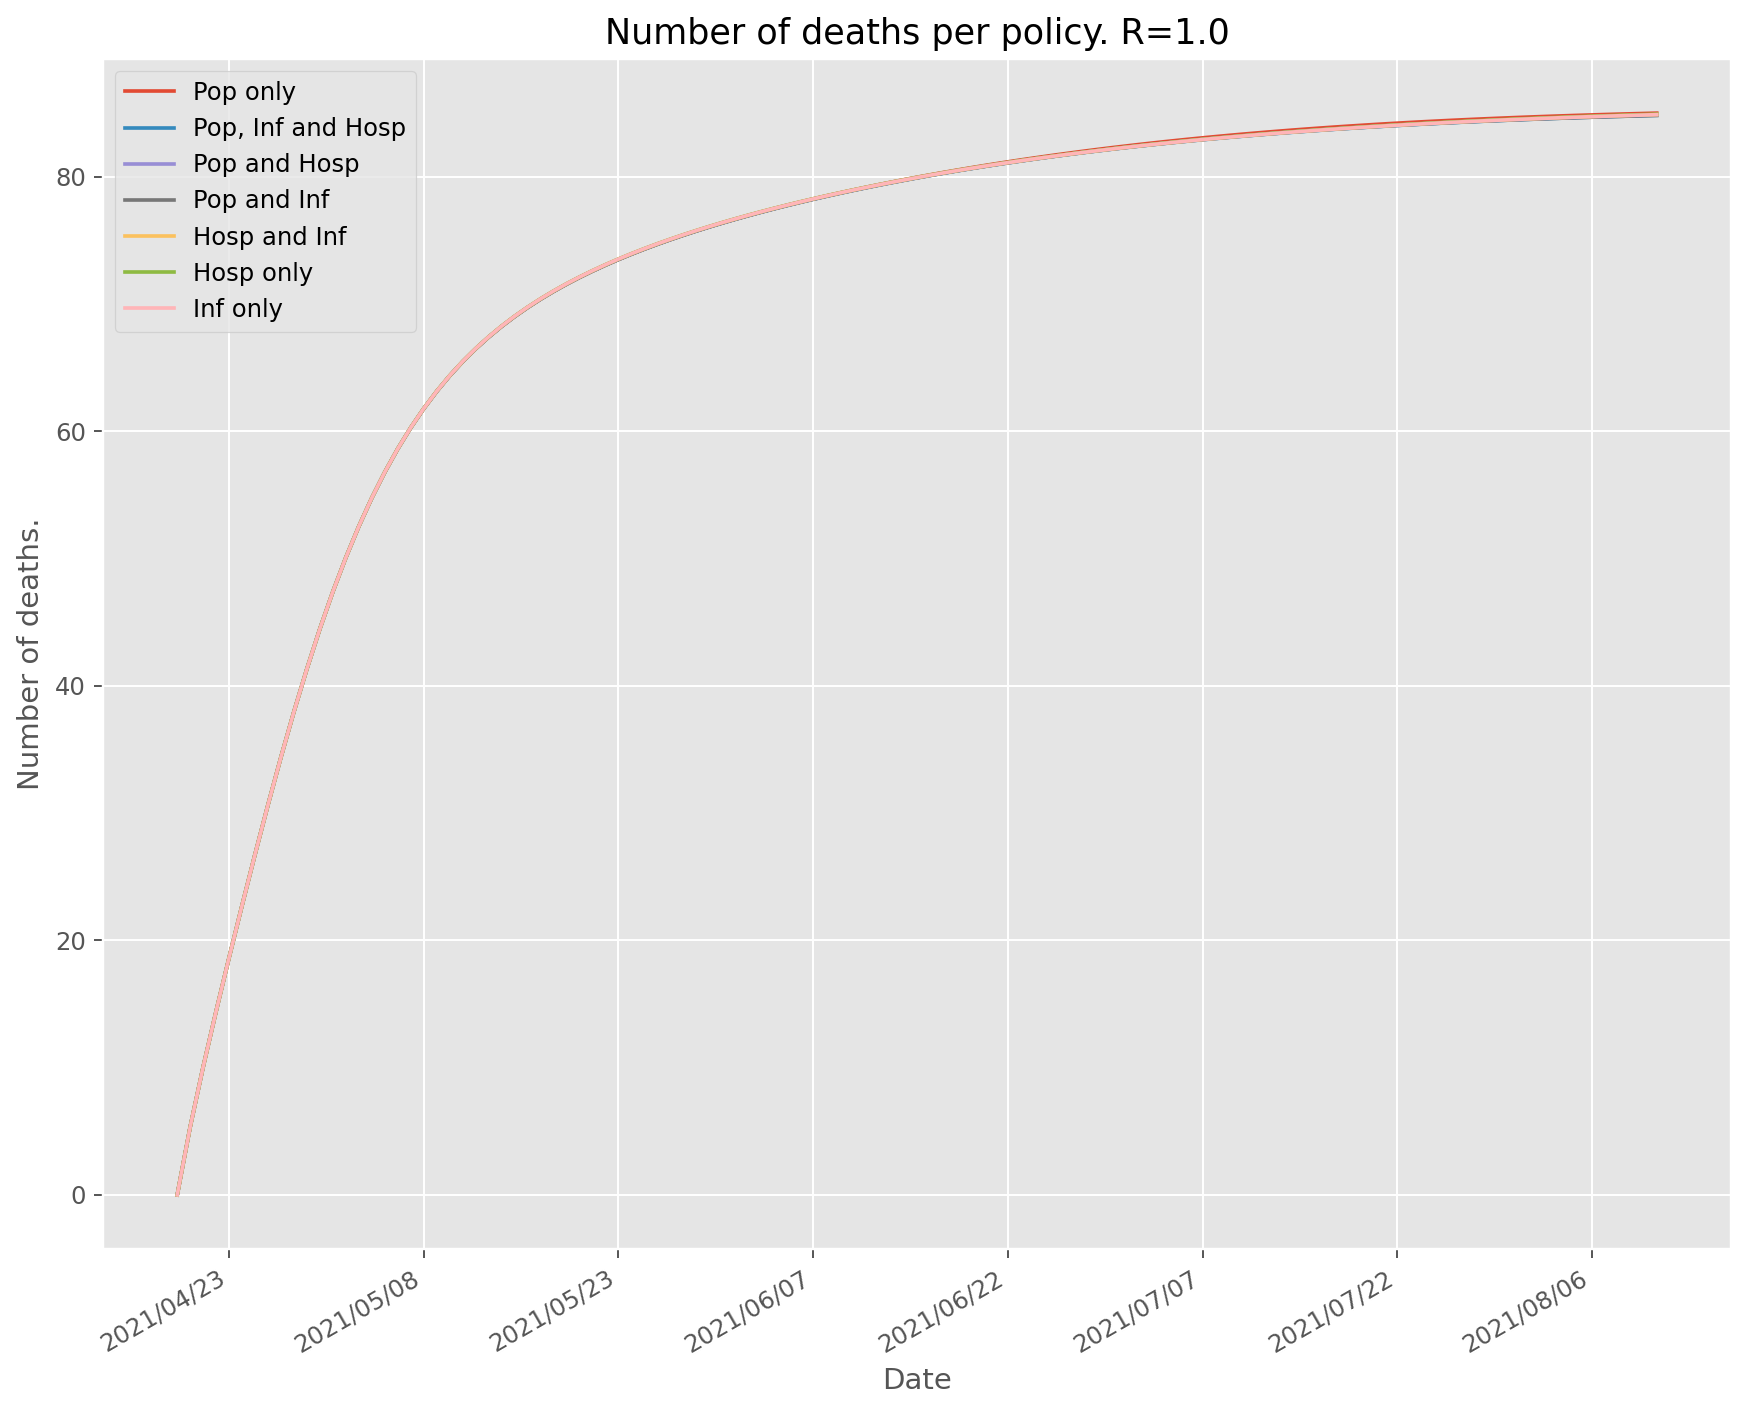

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 133.8041482120222
Pop and Hosp: 134.0105090363753
Pop, Inf and Hosp: 134.16584119611198
Pop only: 134.187640675629
Inf only: 134.99259478128562
Hosp and Inf: 135.10327512538393
Hosp only: 135.27918115292871


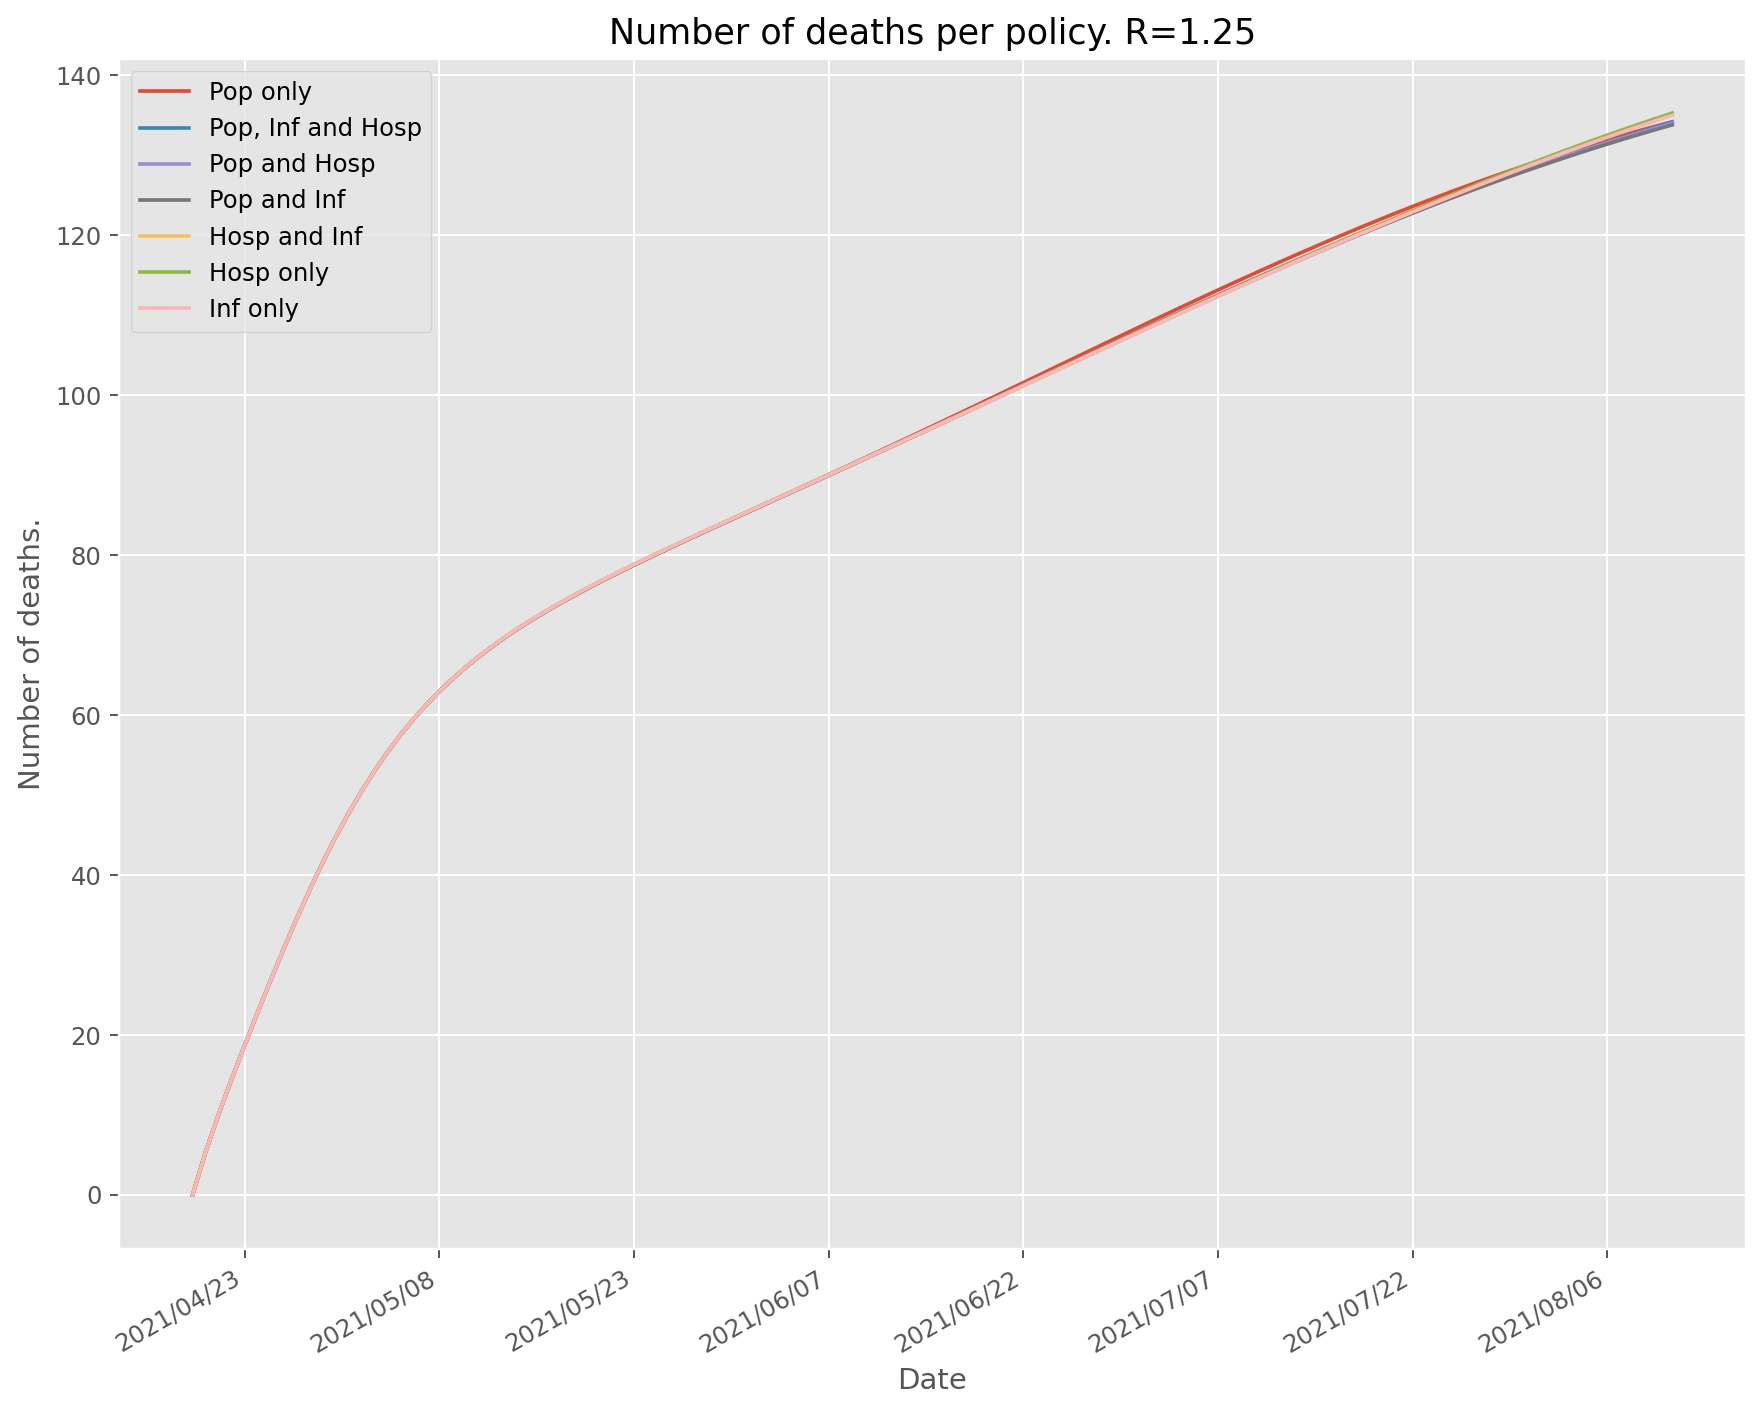

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 323.3435779246116
Pop and Inf: 328.70141311859214
Pop and Hosp: 329.68532124307467
Pop, Inf and Hosp: 332.53424190398135
Inf only: 340.20045685144976
Hosp and Inf: 340.6007733471326
Hosp only: 341.2631369851501


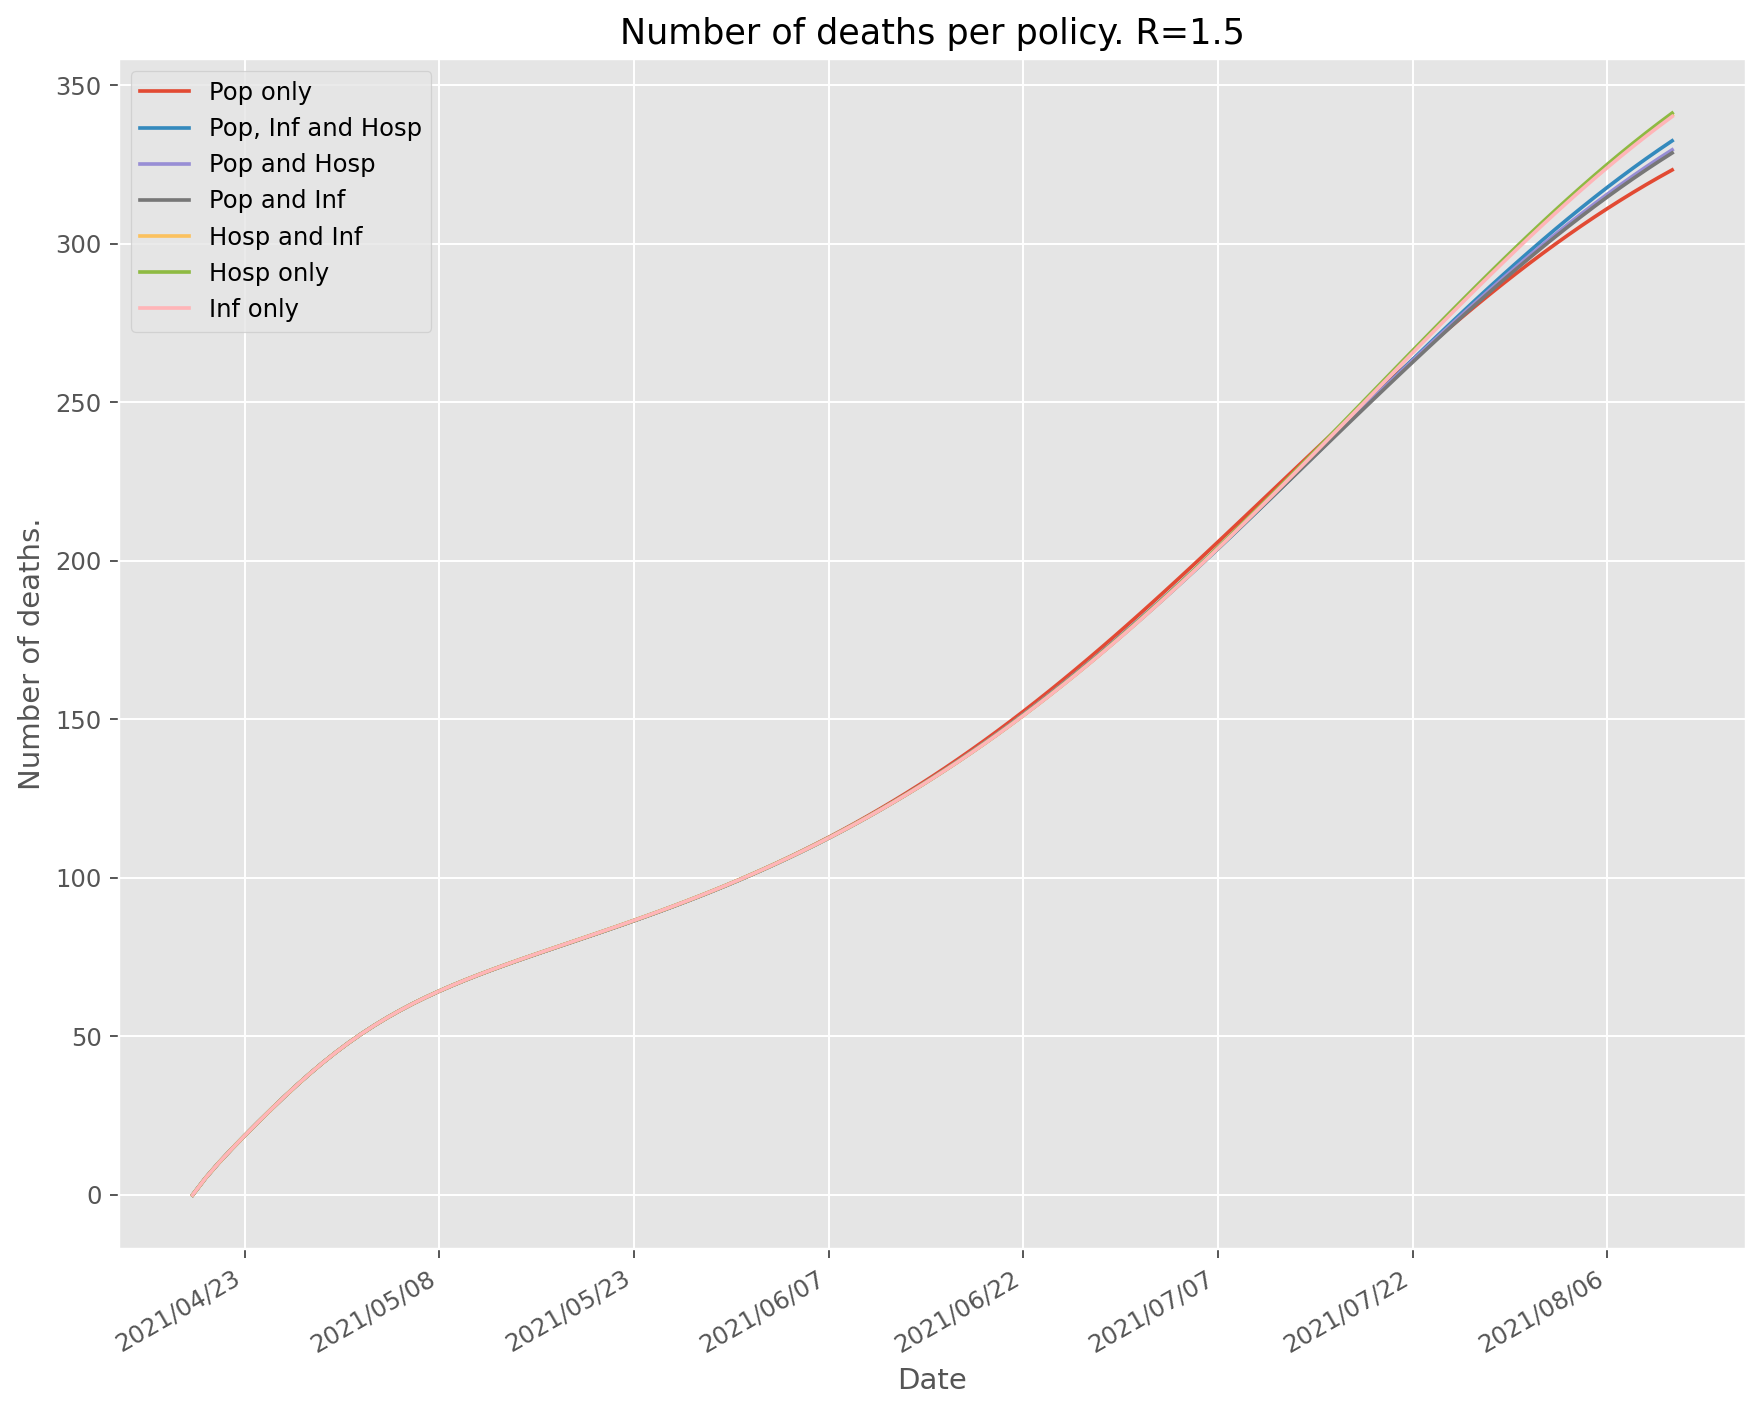

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1131.9690596059277
Pop and Inf: 1162.4574337712274
Pop and Hosp: 1164.8875150283416
Pop, Inf and Hosp: 1175.803503018347
Hosp and Inf: 1207.0765069767376
Inf only: 1207.1973668202559
Hosp only: 1207.8125144797882


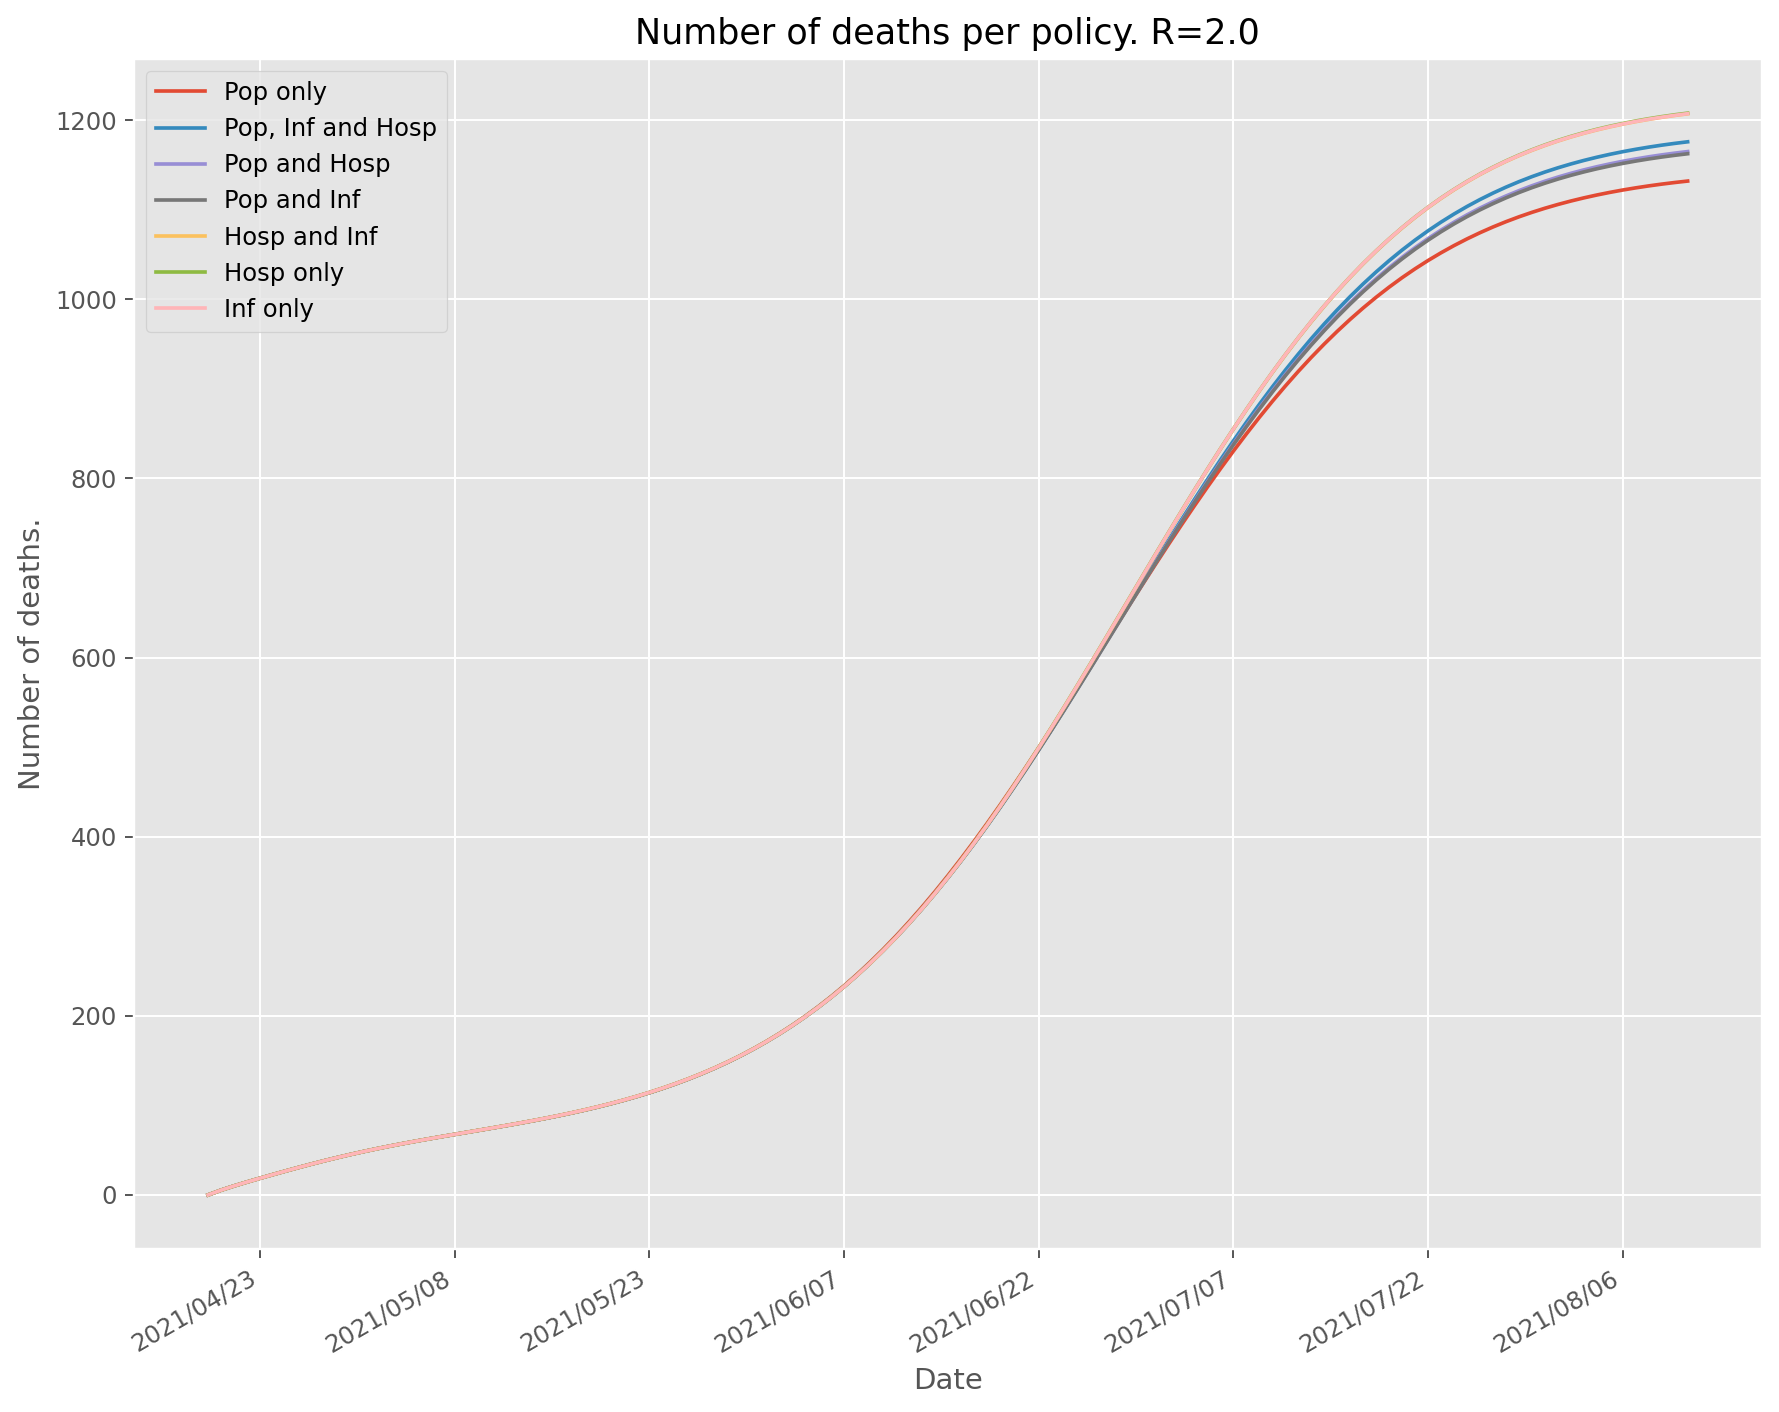

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop and Inf: 84.82342402597175
Pop, Inf and Hosp: 84.82968634985085
Pop and Hosp: 84.8539386482398
Inf only: 84.88169292883347
Hosp and Inf: 84.89038340950167
Hosp only: 84.91834119789407
Pop only: 85.00249819210443


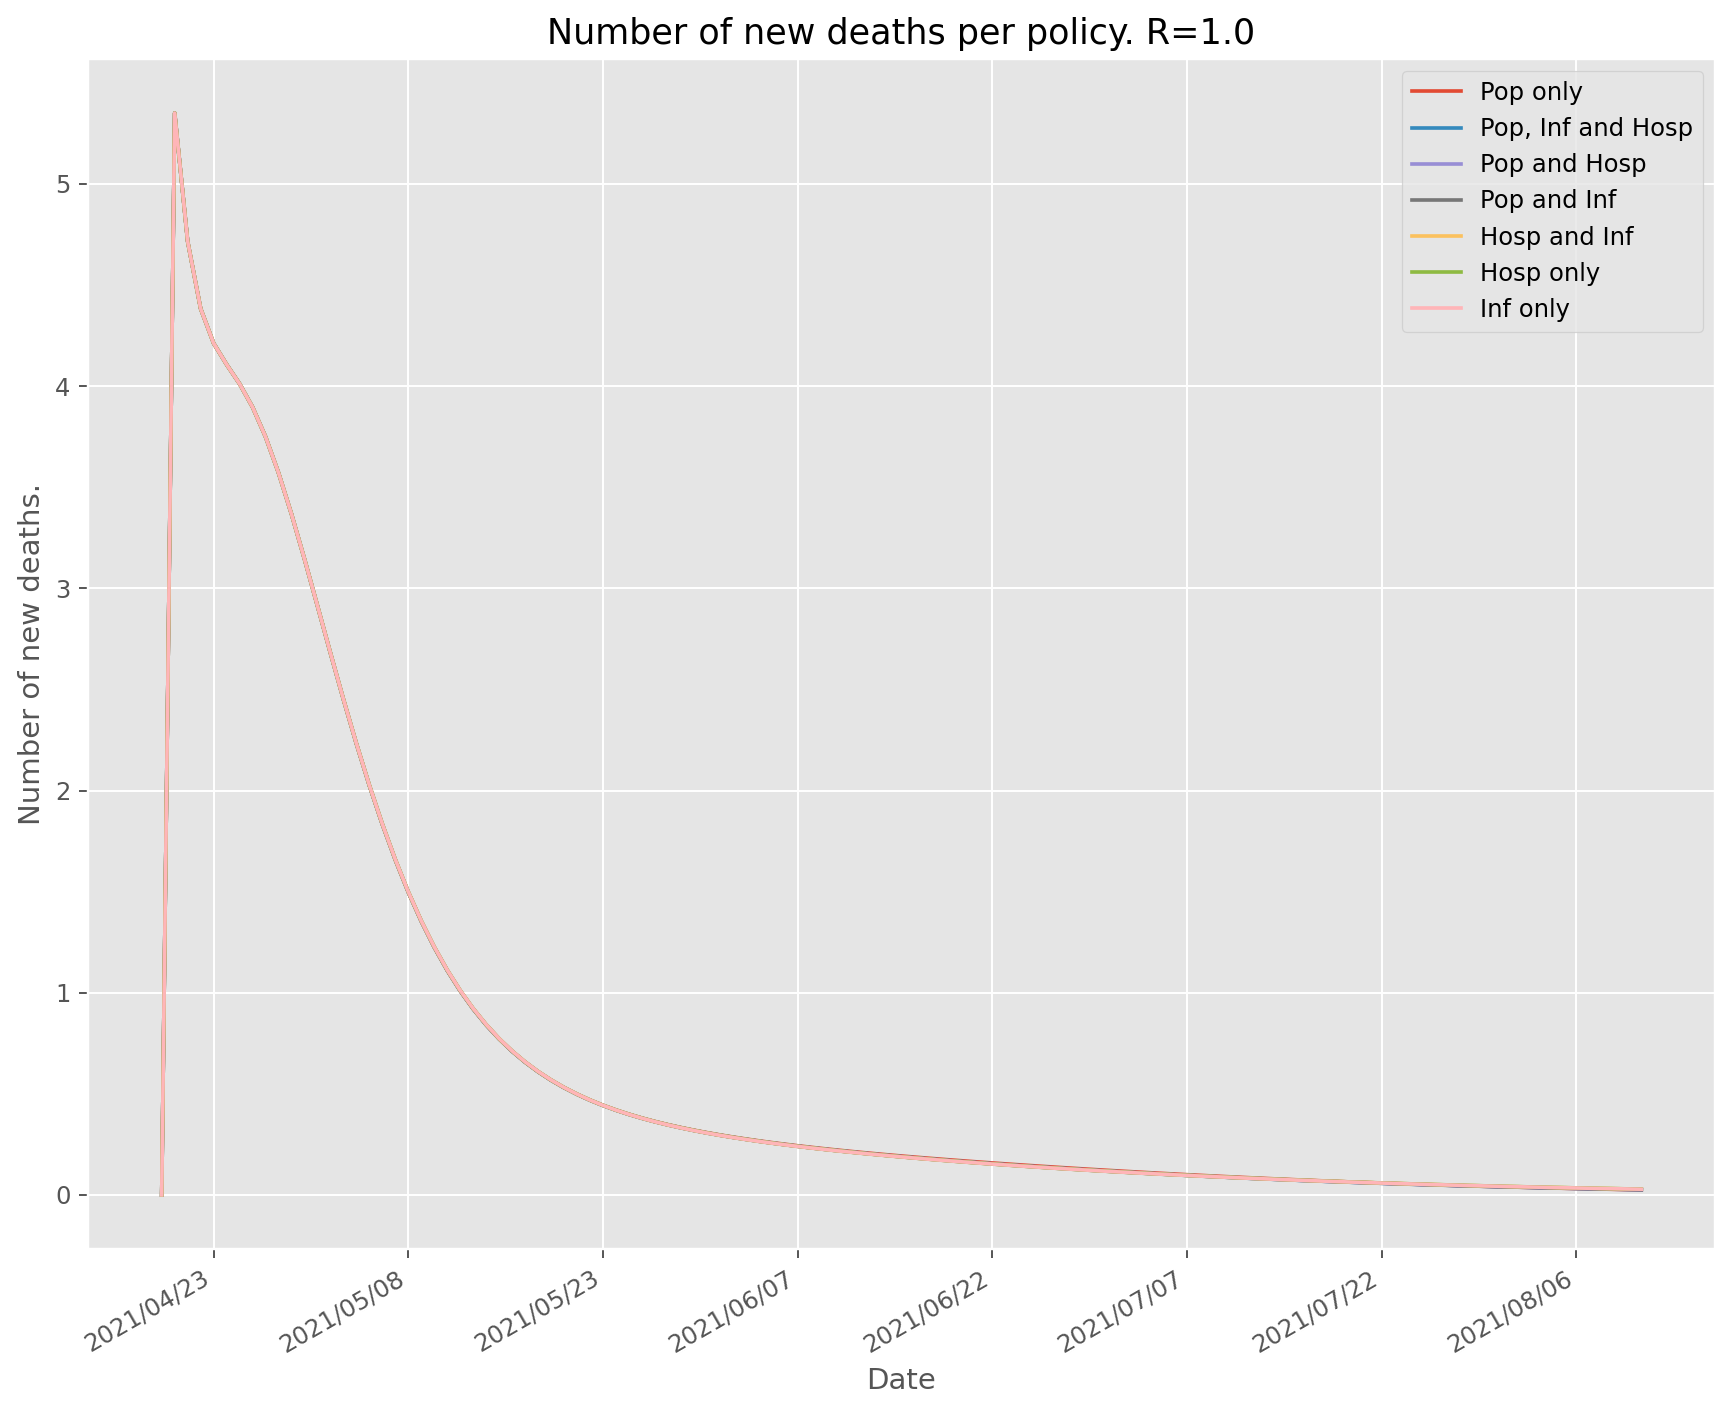

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 133.80414821202217
Pop and Hosp: 134.0105090363753
Pop, Inf and Hosp: 134.165841196112
Pop only: 134.187640675629
Inf only: 134.99259478128562
Hosp and Inf: 135.10327512538393
Hosp only: 135.27918115292874


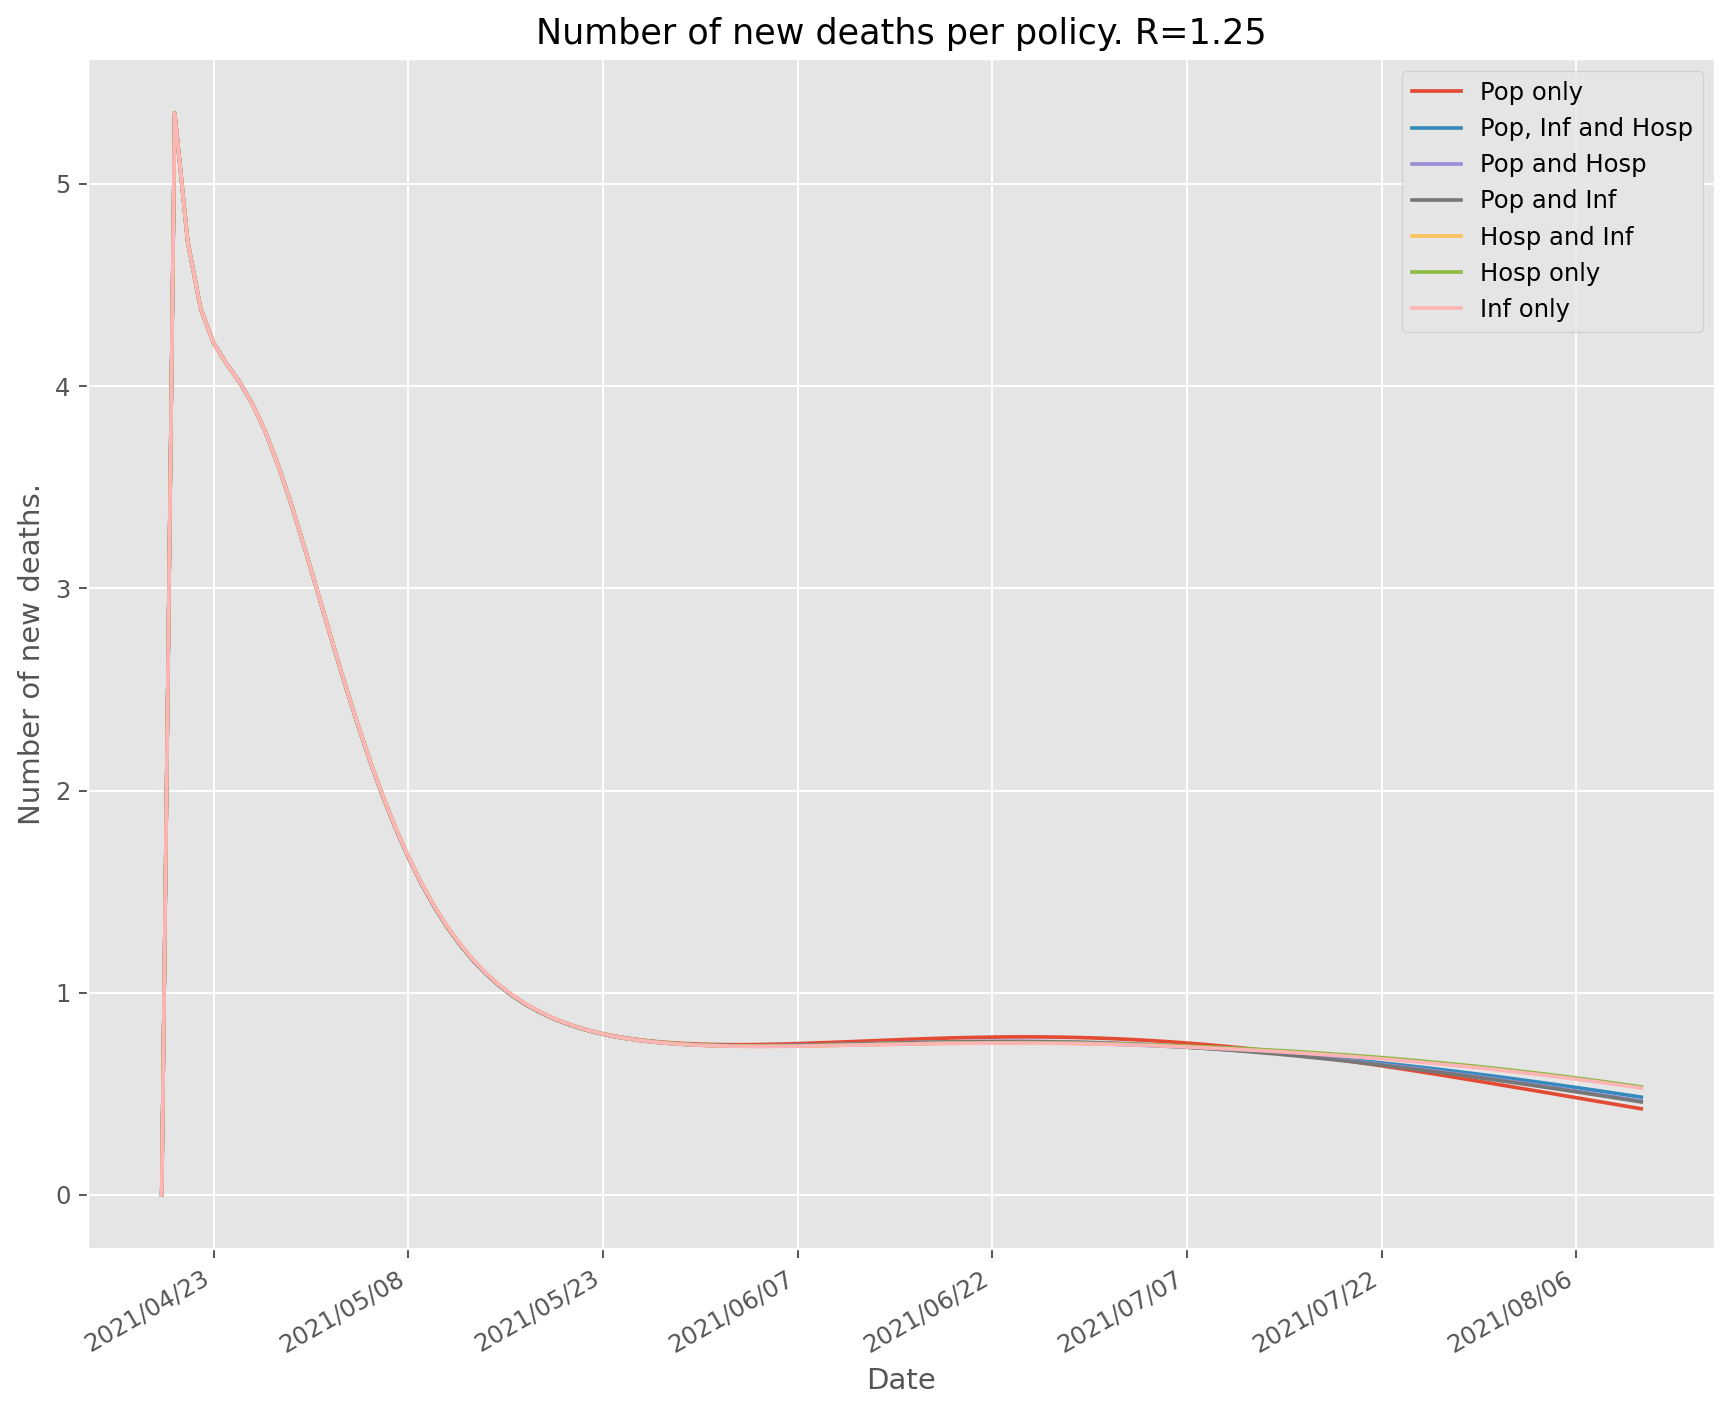

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 323.3435779246116
Pop and Inf: 328.70141311859214
Pop and Hosp: 329.68532124307455
Pop, Inf and Hosp: 332.53424190398147
Inf only: 340.20045685144976
Hosp and Inf: 340.6007733471325
Hosp only: 341.26313698514997


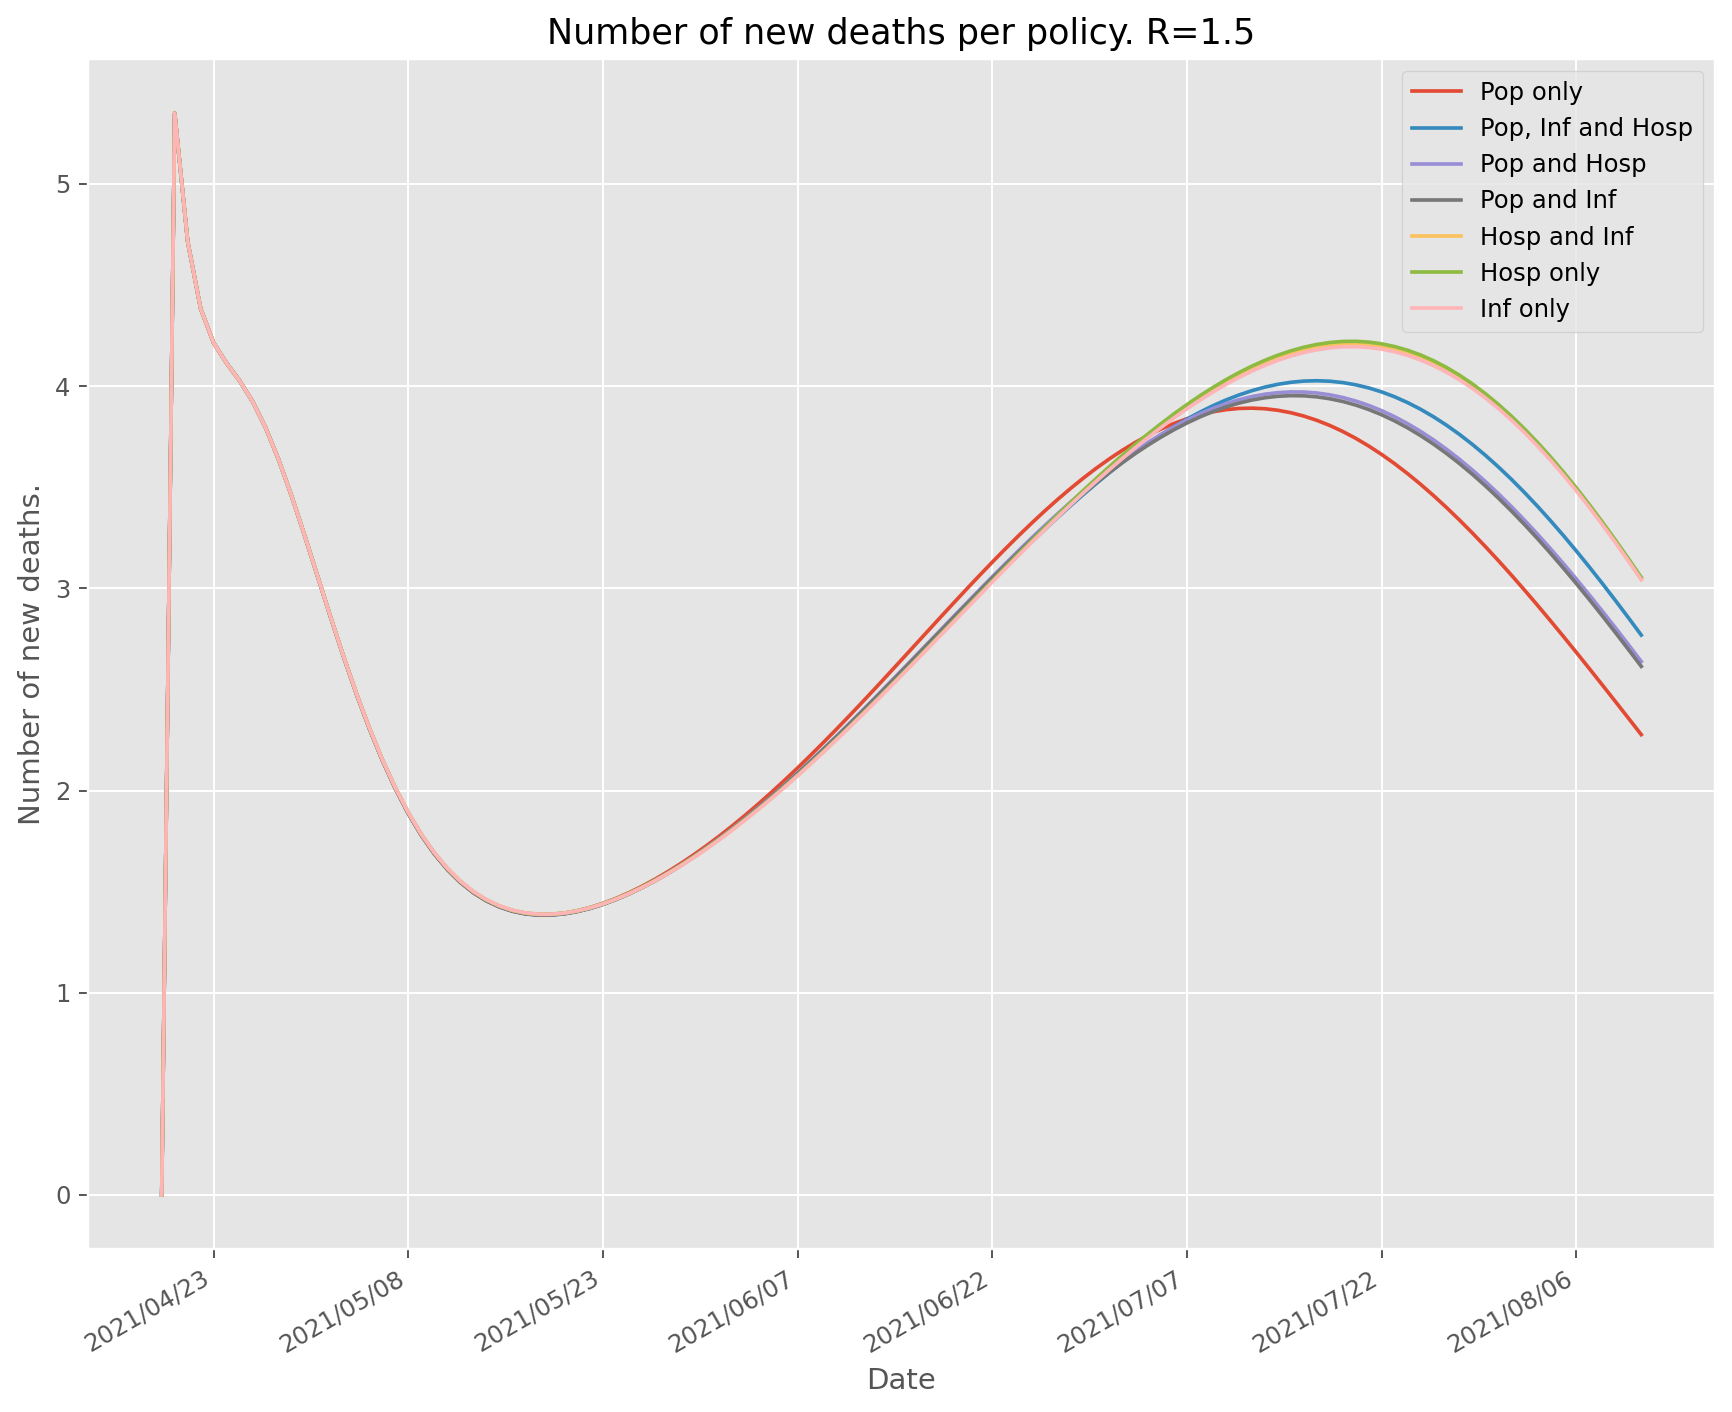

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1131.9690596059274
Pop and Inf: 1162.4574337712274
Pop and Hosp: 1164.8875150283413
Pop, Inf and Hosp: 1175.8035030183469
Hosp and Inf: 1207.0765069767376
Inf only: 1207.197366820256
Hosp only: 1207.8125144797882


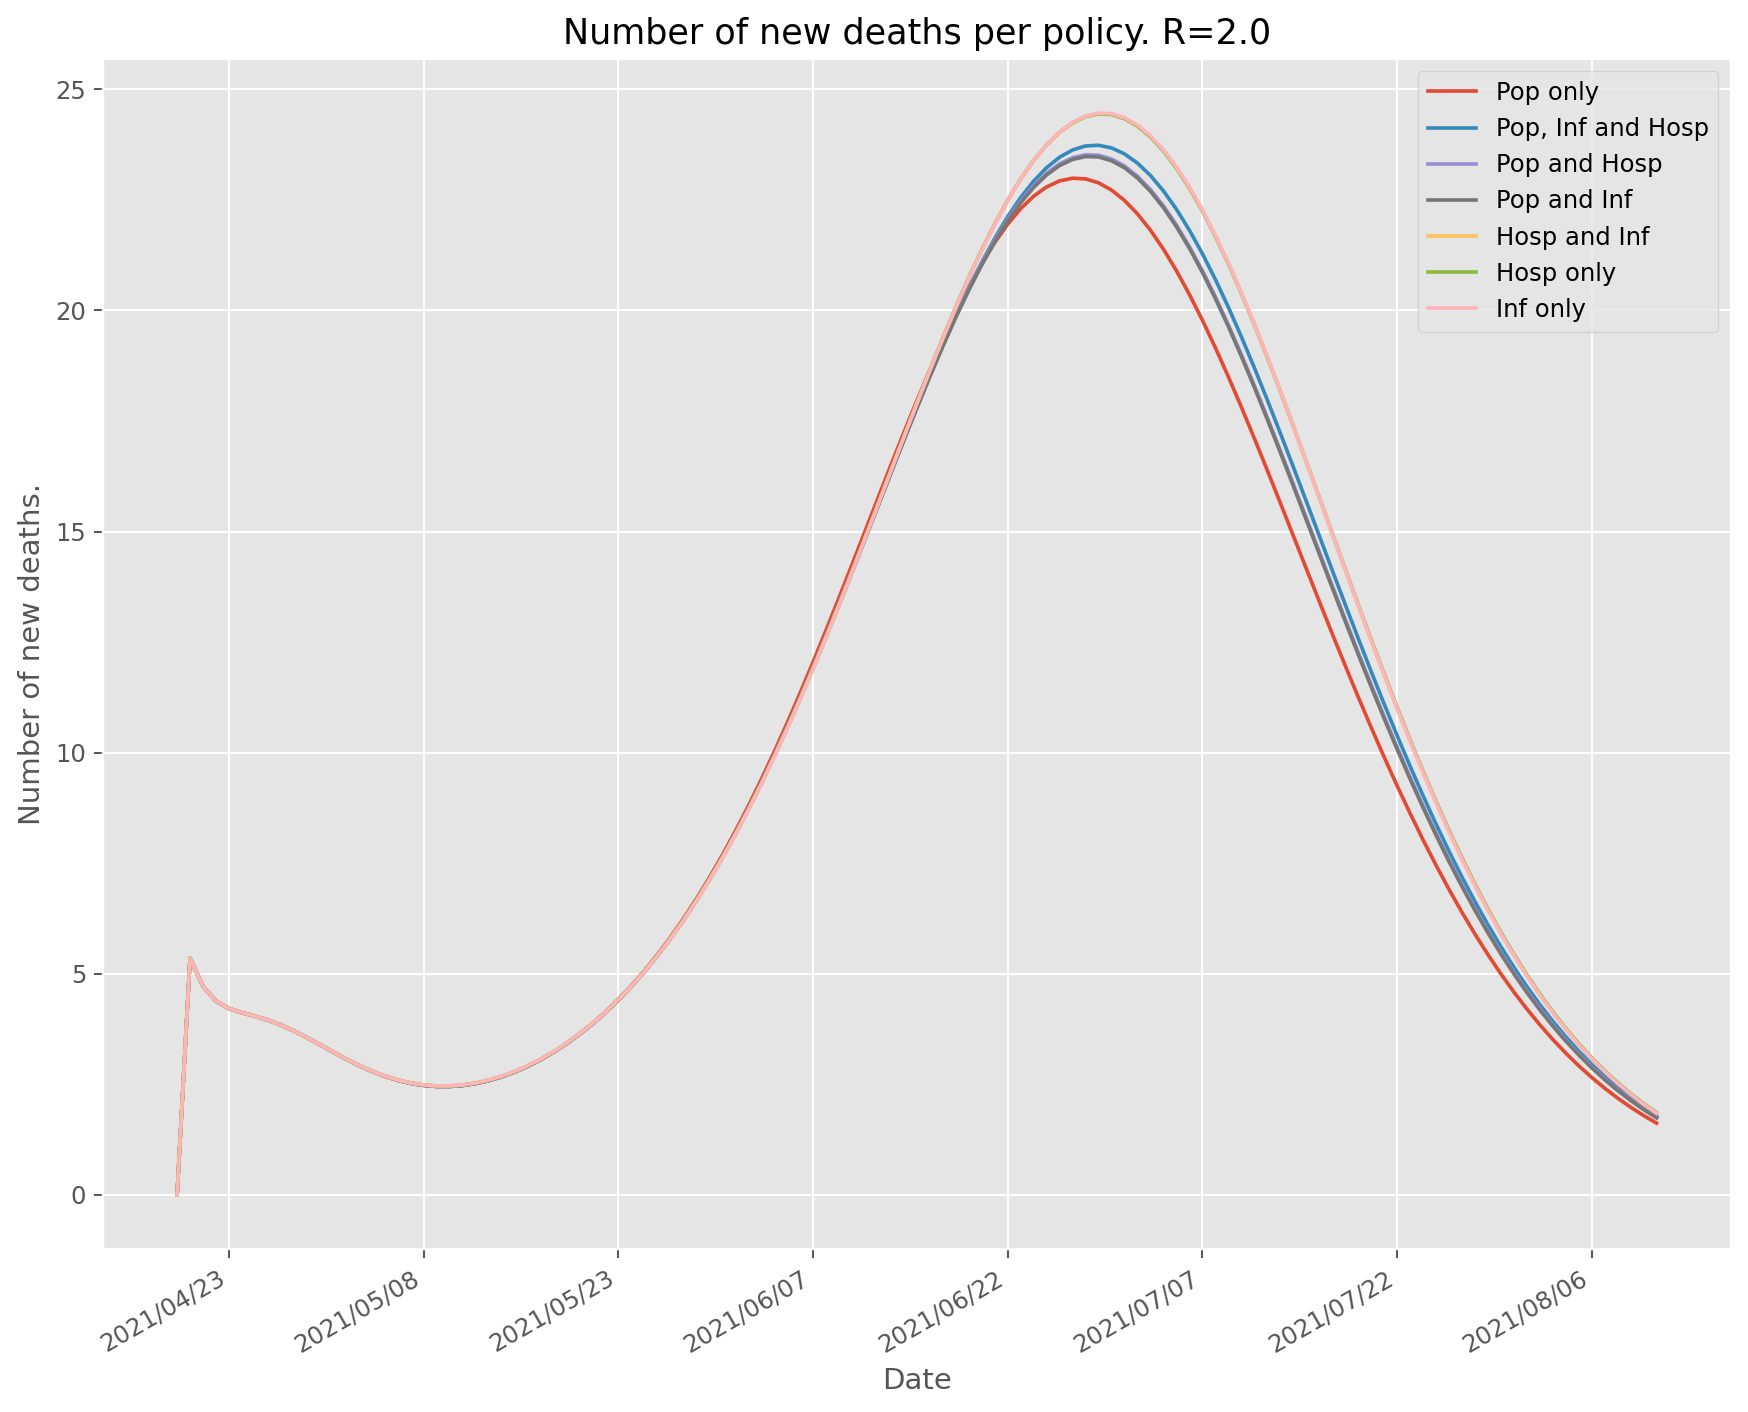

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 7947.996066120159
Hosp and Inf: 7956.925369831204
Hosp only: 7967.806941300746
Pop, Inf and Hosp: 7986.605946234785
Pop and Inf: 8011.4010310736885
Pop and Hosp: 8019.58958769189
Pop only: 8176.645126670317


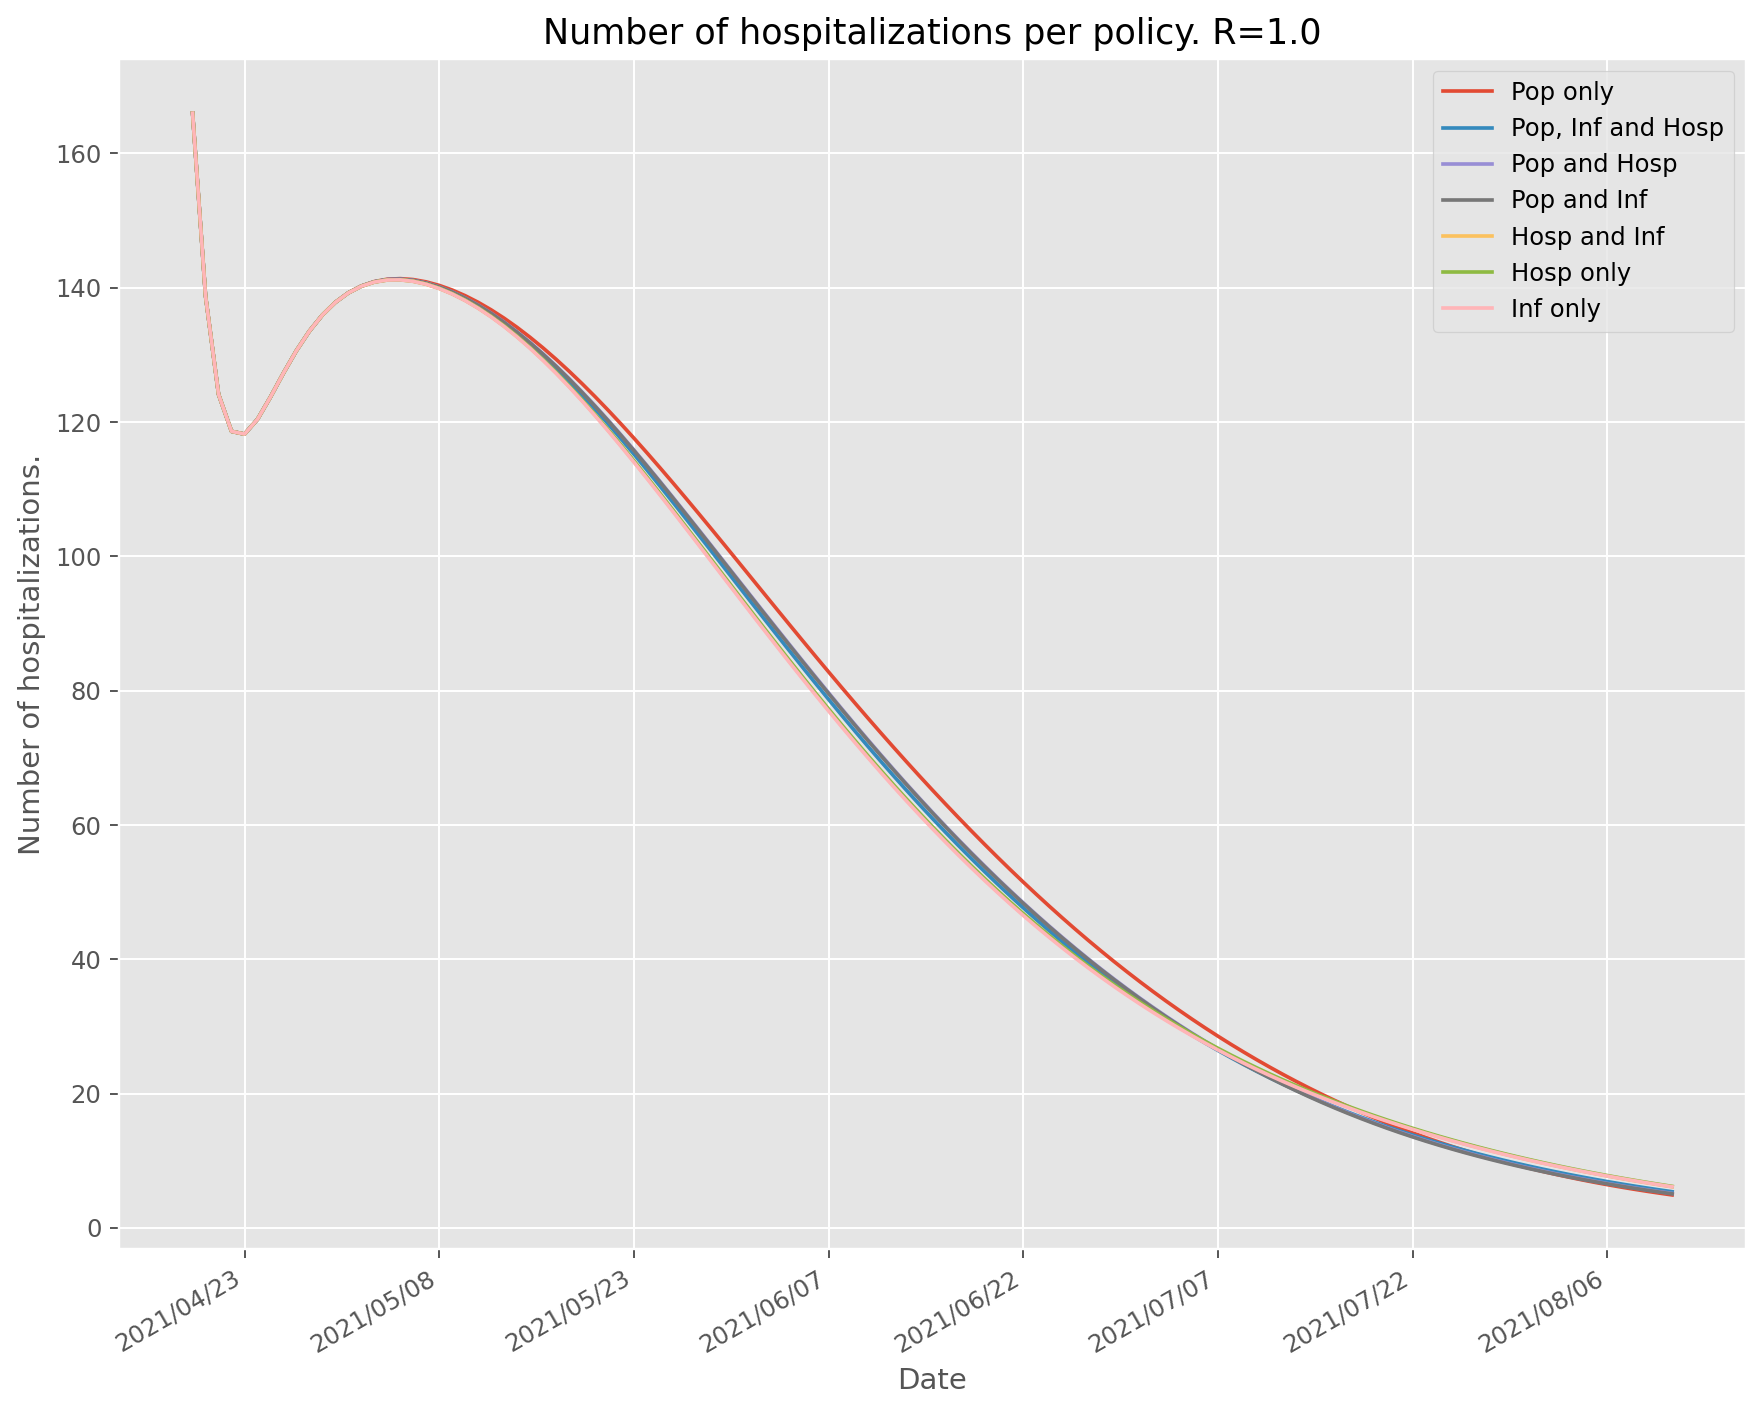

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 22886.39672524816
Pop and Hosp: 22948.897685468568
Pop, Inf and Hosp: 22962.661567418818
Inf only: 23224.736303794387
Hosp and Inf: 23269.348226123686
Hosp only: 23334.7781130909
Pop only: 23438.99735243585


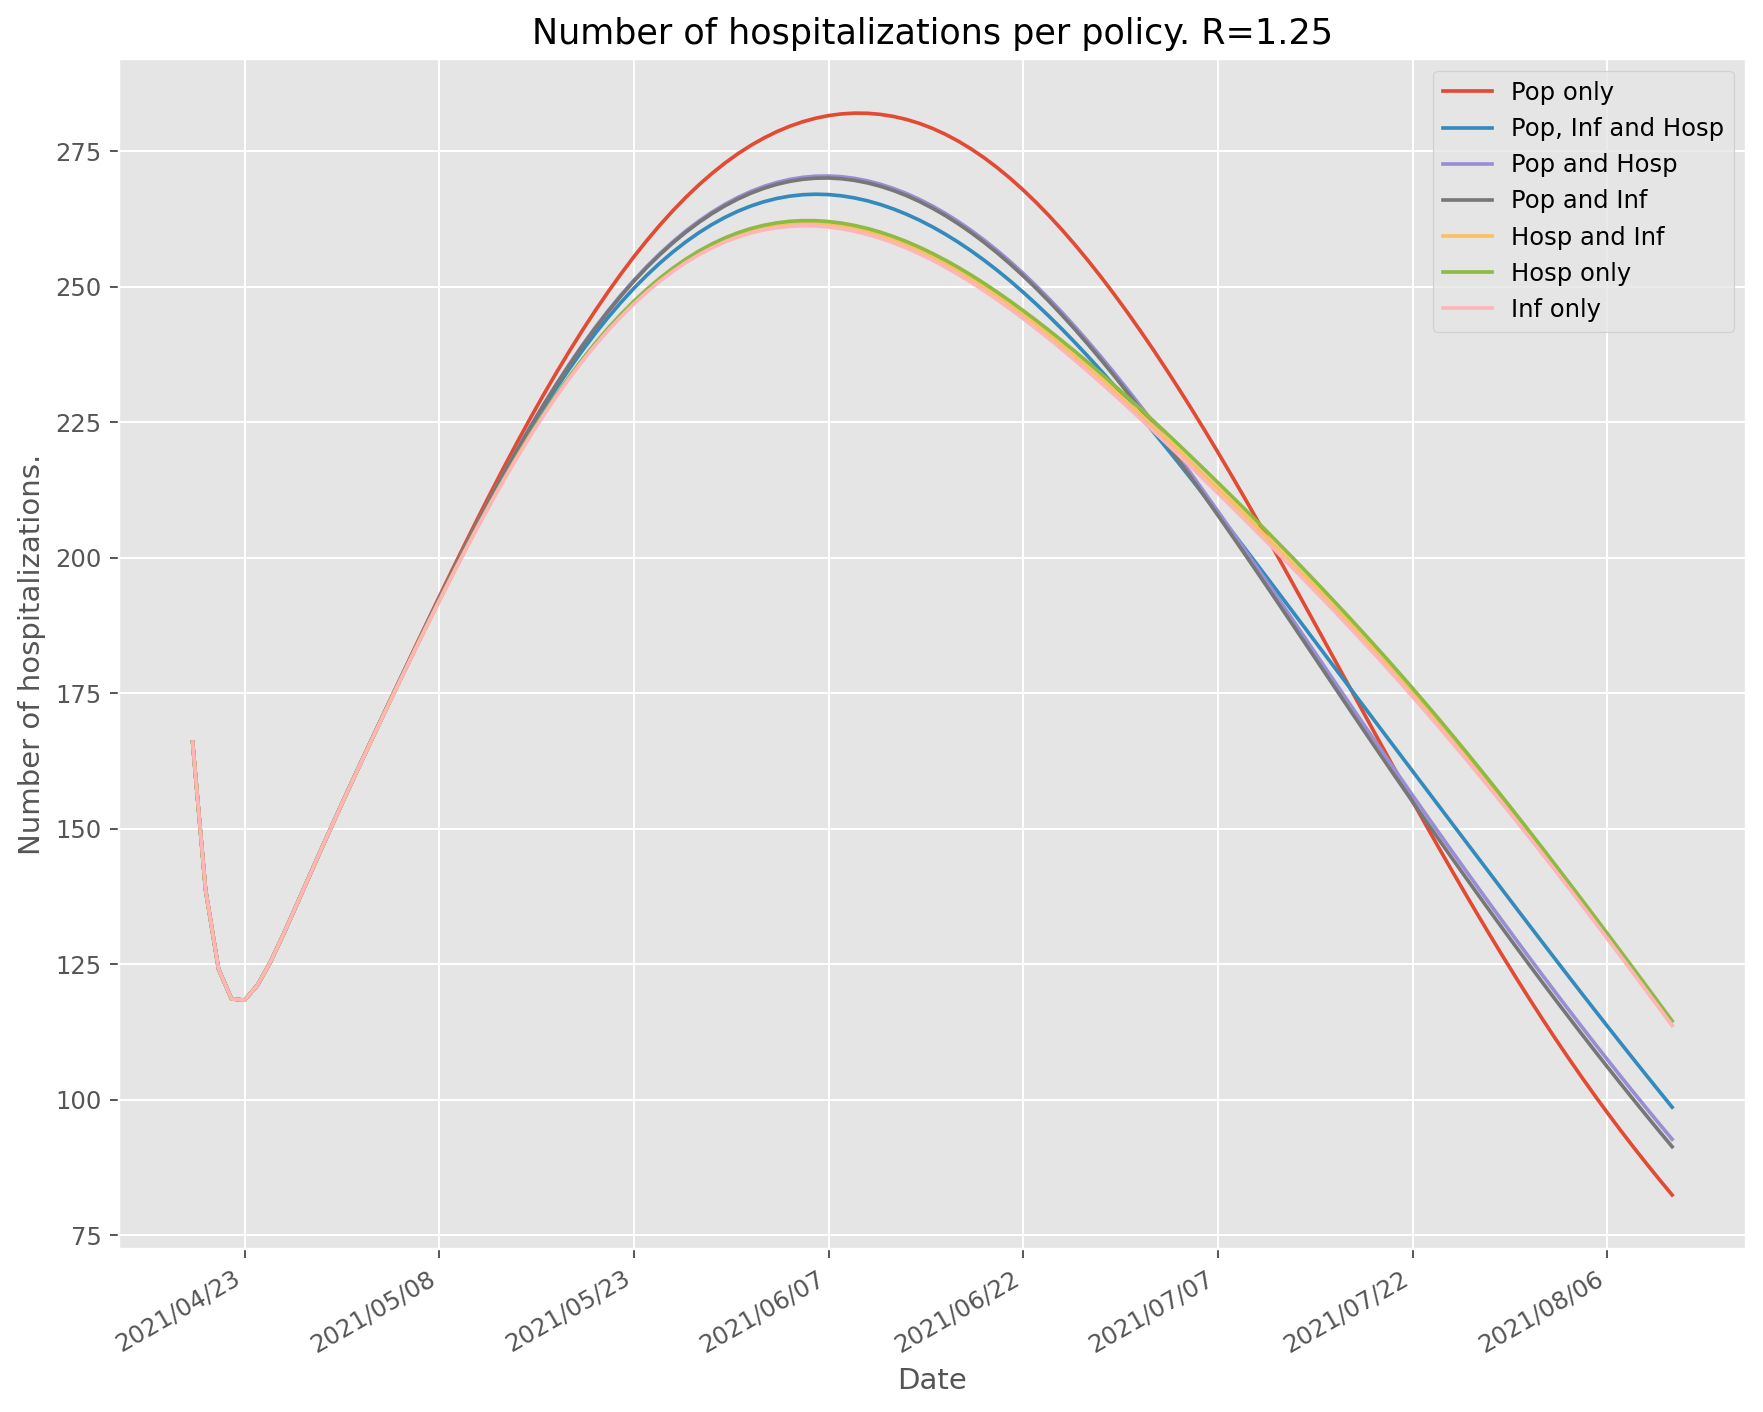

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 260361.1031637629
Pop and Inf: 266078.99689228664
Pop and Hosp: 266700.11611414957
Pop, Inf and Hosp: 269656.1726850048
Inf only: 277729.9684587129
Hosp and Inf: 278076.90151449933
Hosp only: 278641.6318469295


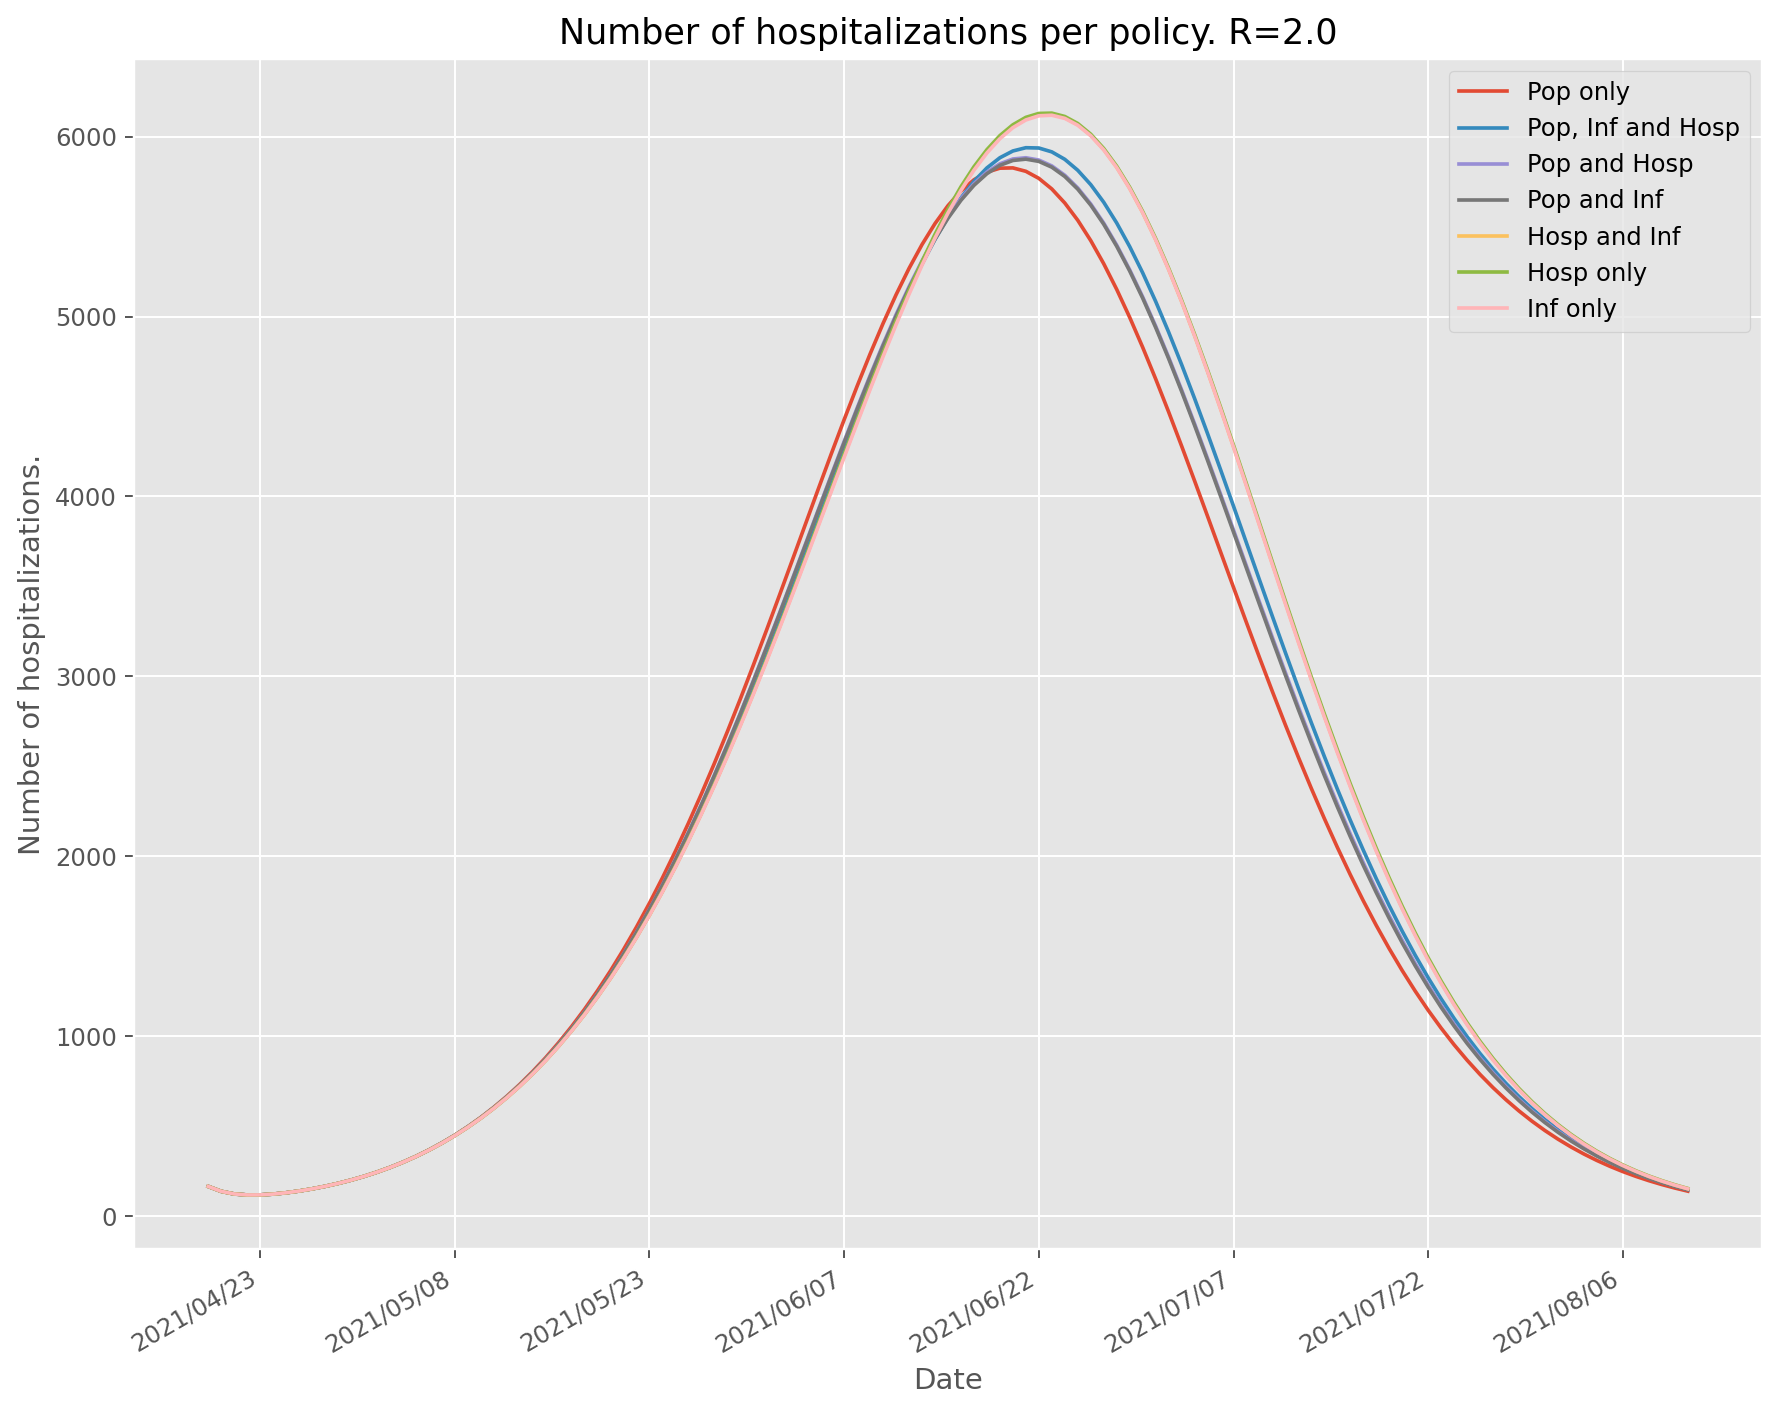

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 200923.70108091753
Hosp and Inf: 201132.5258691166
Hosp only: 201329.31204271686
Pop, Inf and Hosp: 203403.64187575778
Pop and Inf: 204576.83222835485
Pop and Hosp: 204700.0513776059
Pop only: 209369.8936390977


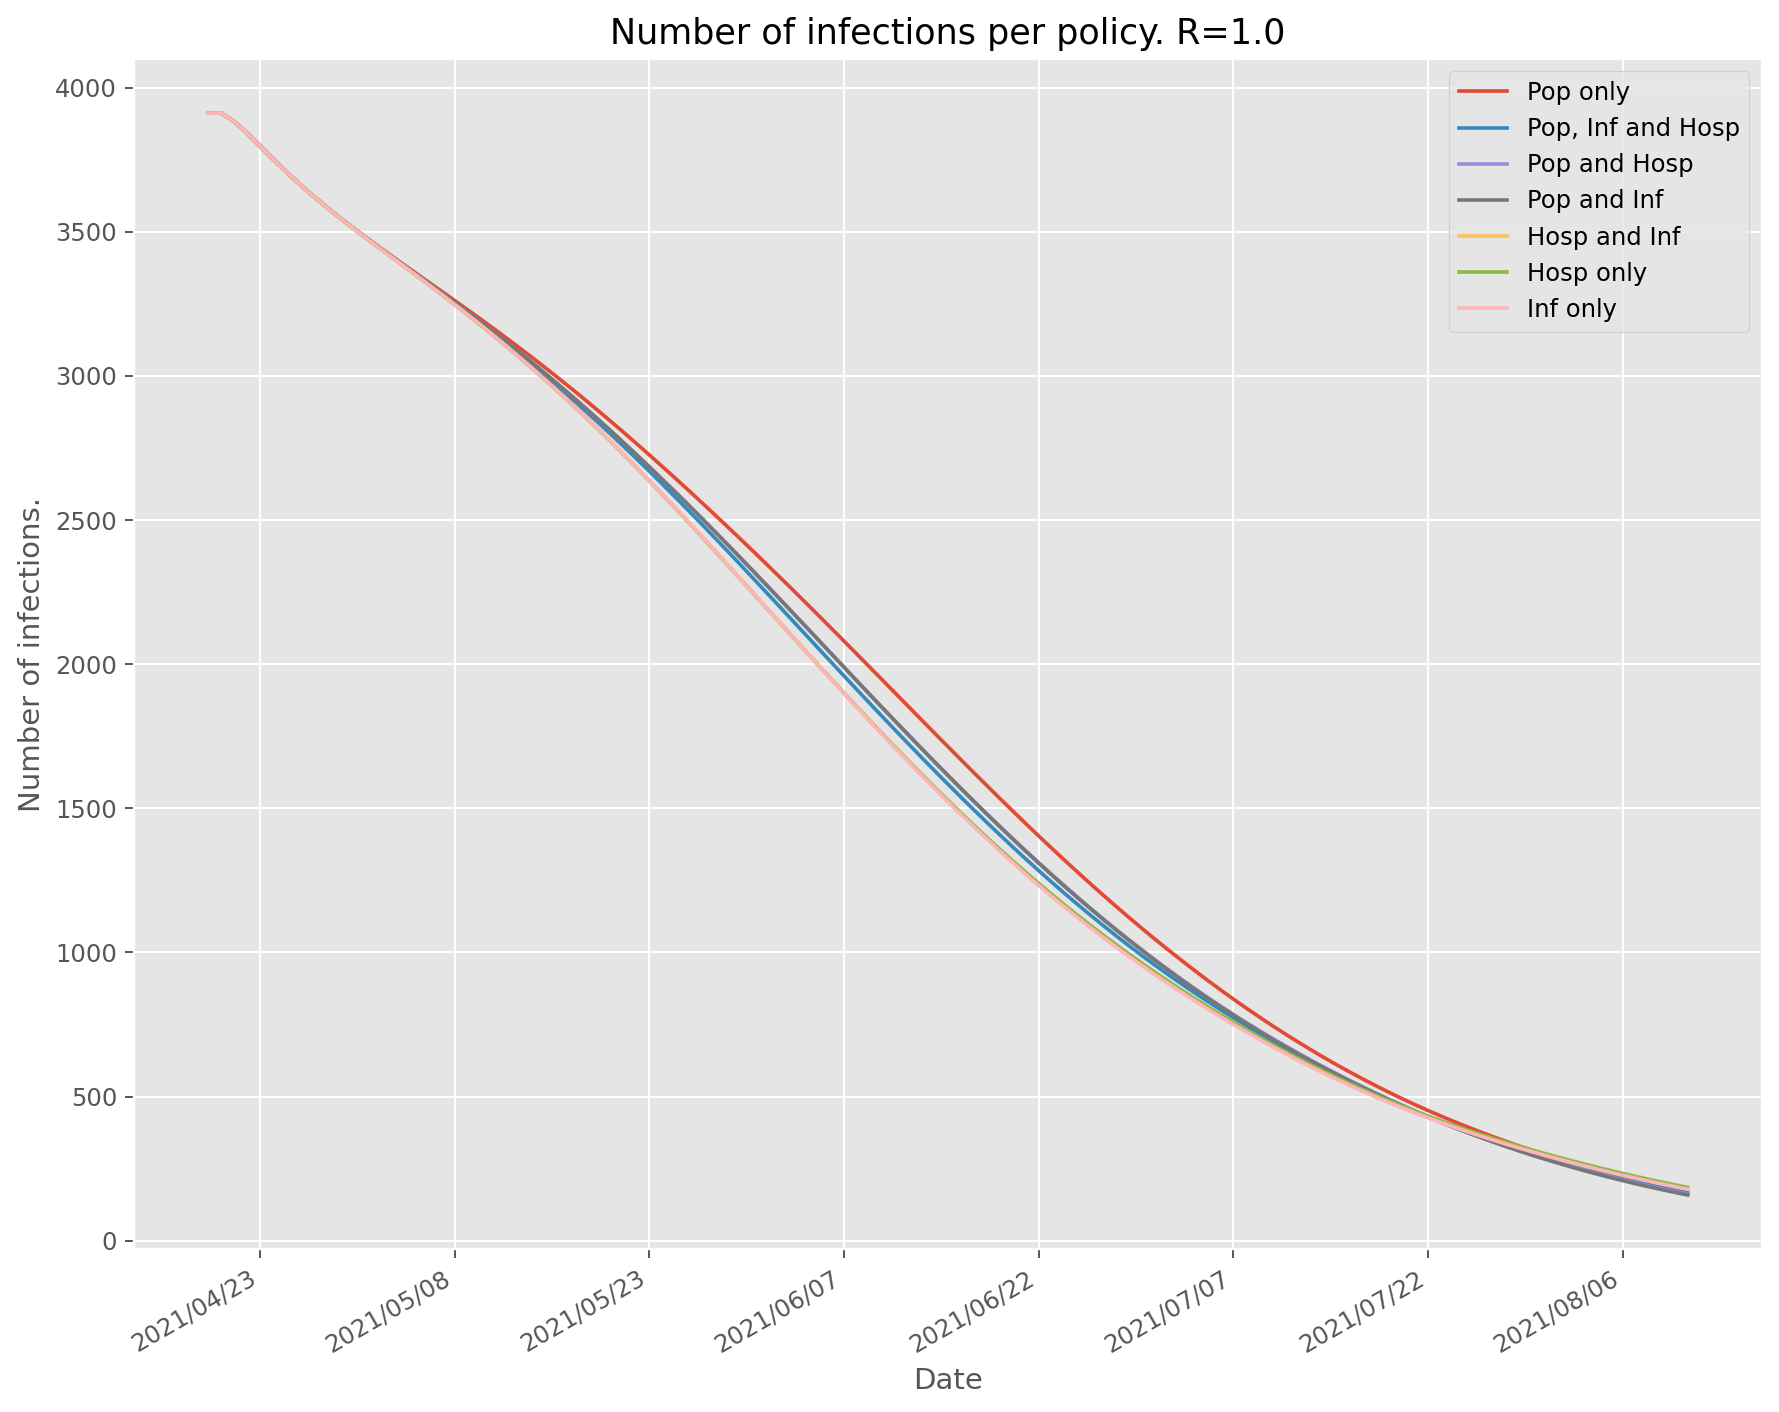

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 758932.6054795322
Hosp and Inf: 761254.6064639101
Hosp only: 763660.2994271566
Pop, Inf and Hosp: 764919.0288154898
Pop and Inf: 766509.3711592094
Pop and Hosp: 768365.6881617059
Pop only: 787315.7575859654


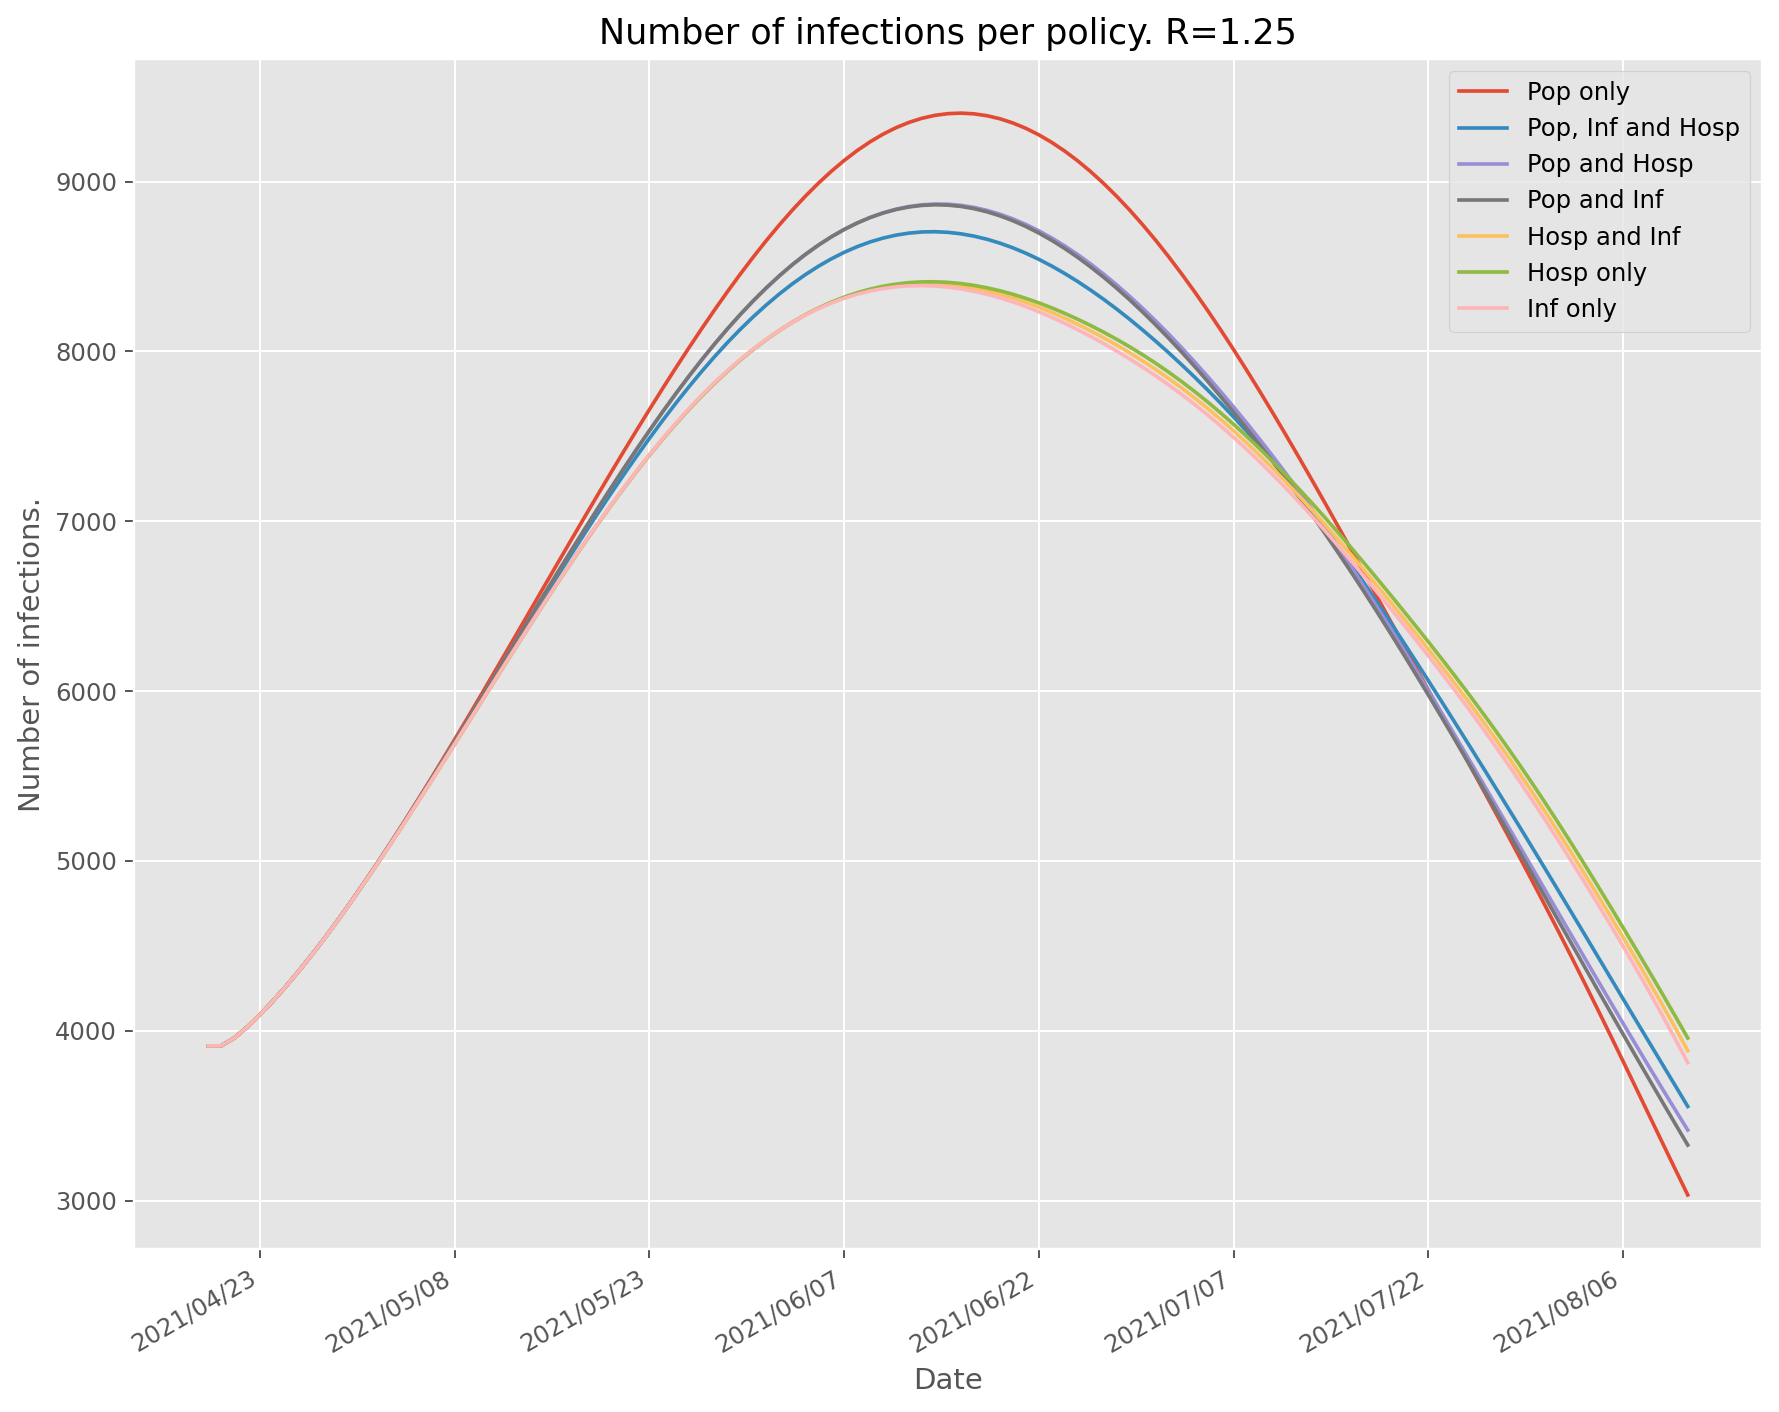

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 2713759.8827707213
Pop only: 2717797.4338278854
Pop and Hosp: 2722312.599552249
Pop, Inf and Hosp: 2727285.533812989
Inf only: 2734232.9268830535
Hosp and Inf: 2741571.3309444343
Hosp only: 2749821.933649728


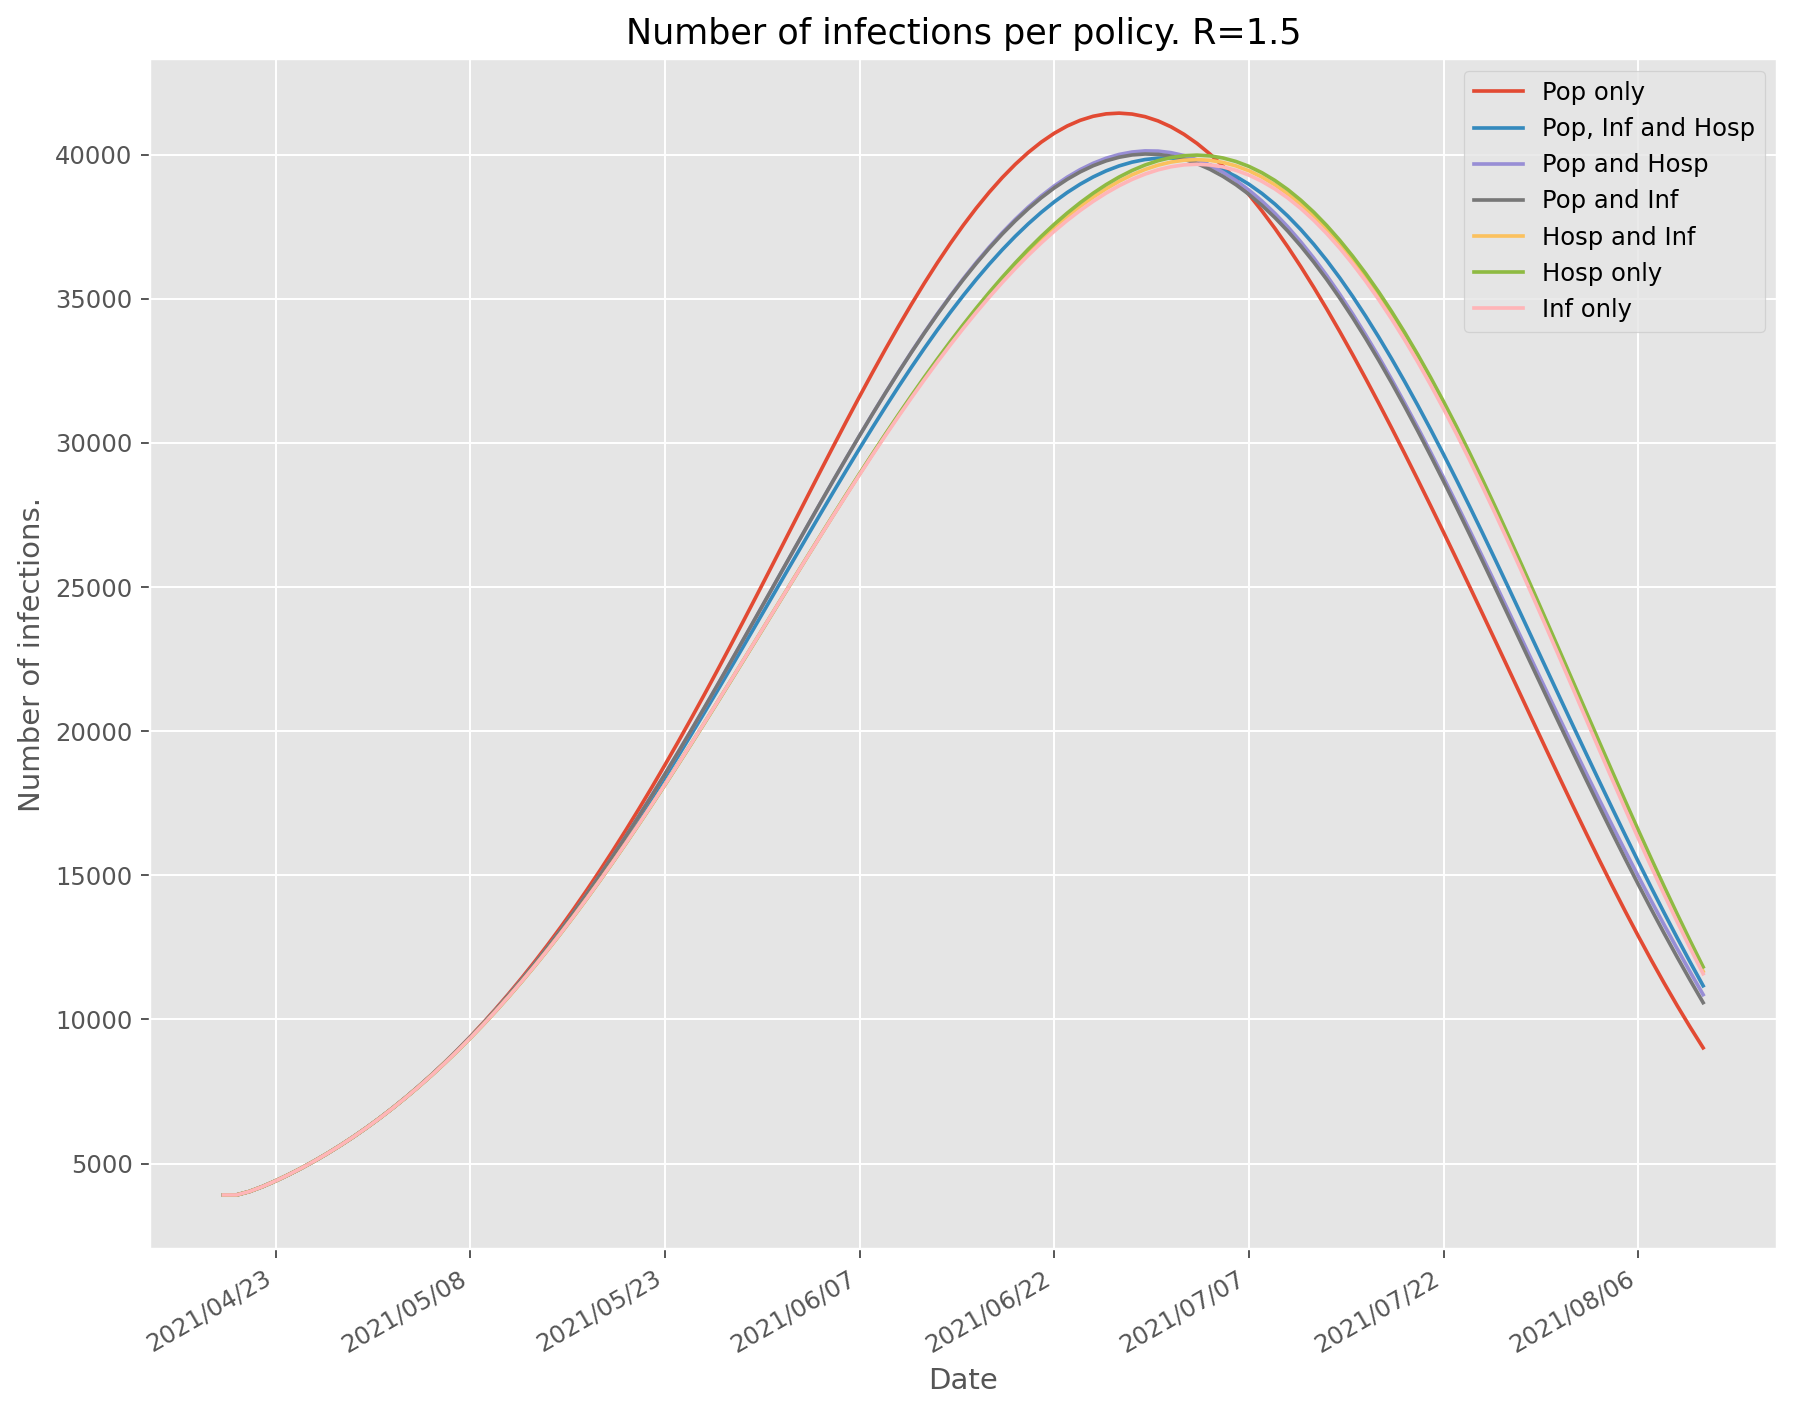

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 7570479.2913715355
Pop and Inf: 7600253.736922088
Inf only: 7601825.965314941
Pop and Hosp: 7609119.384045287
Hosp and Inf: 7610332.888435119
Pop, Inf and Hosp: 7610471.7963654455
Hosp only: 7618829.599000711


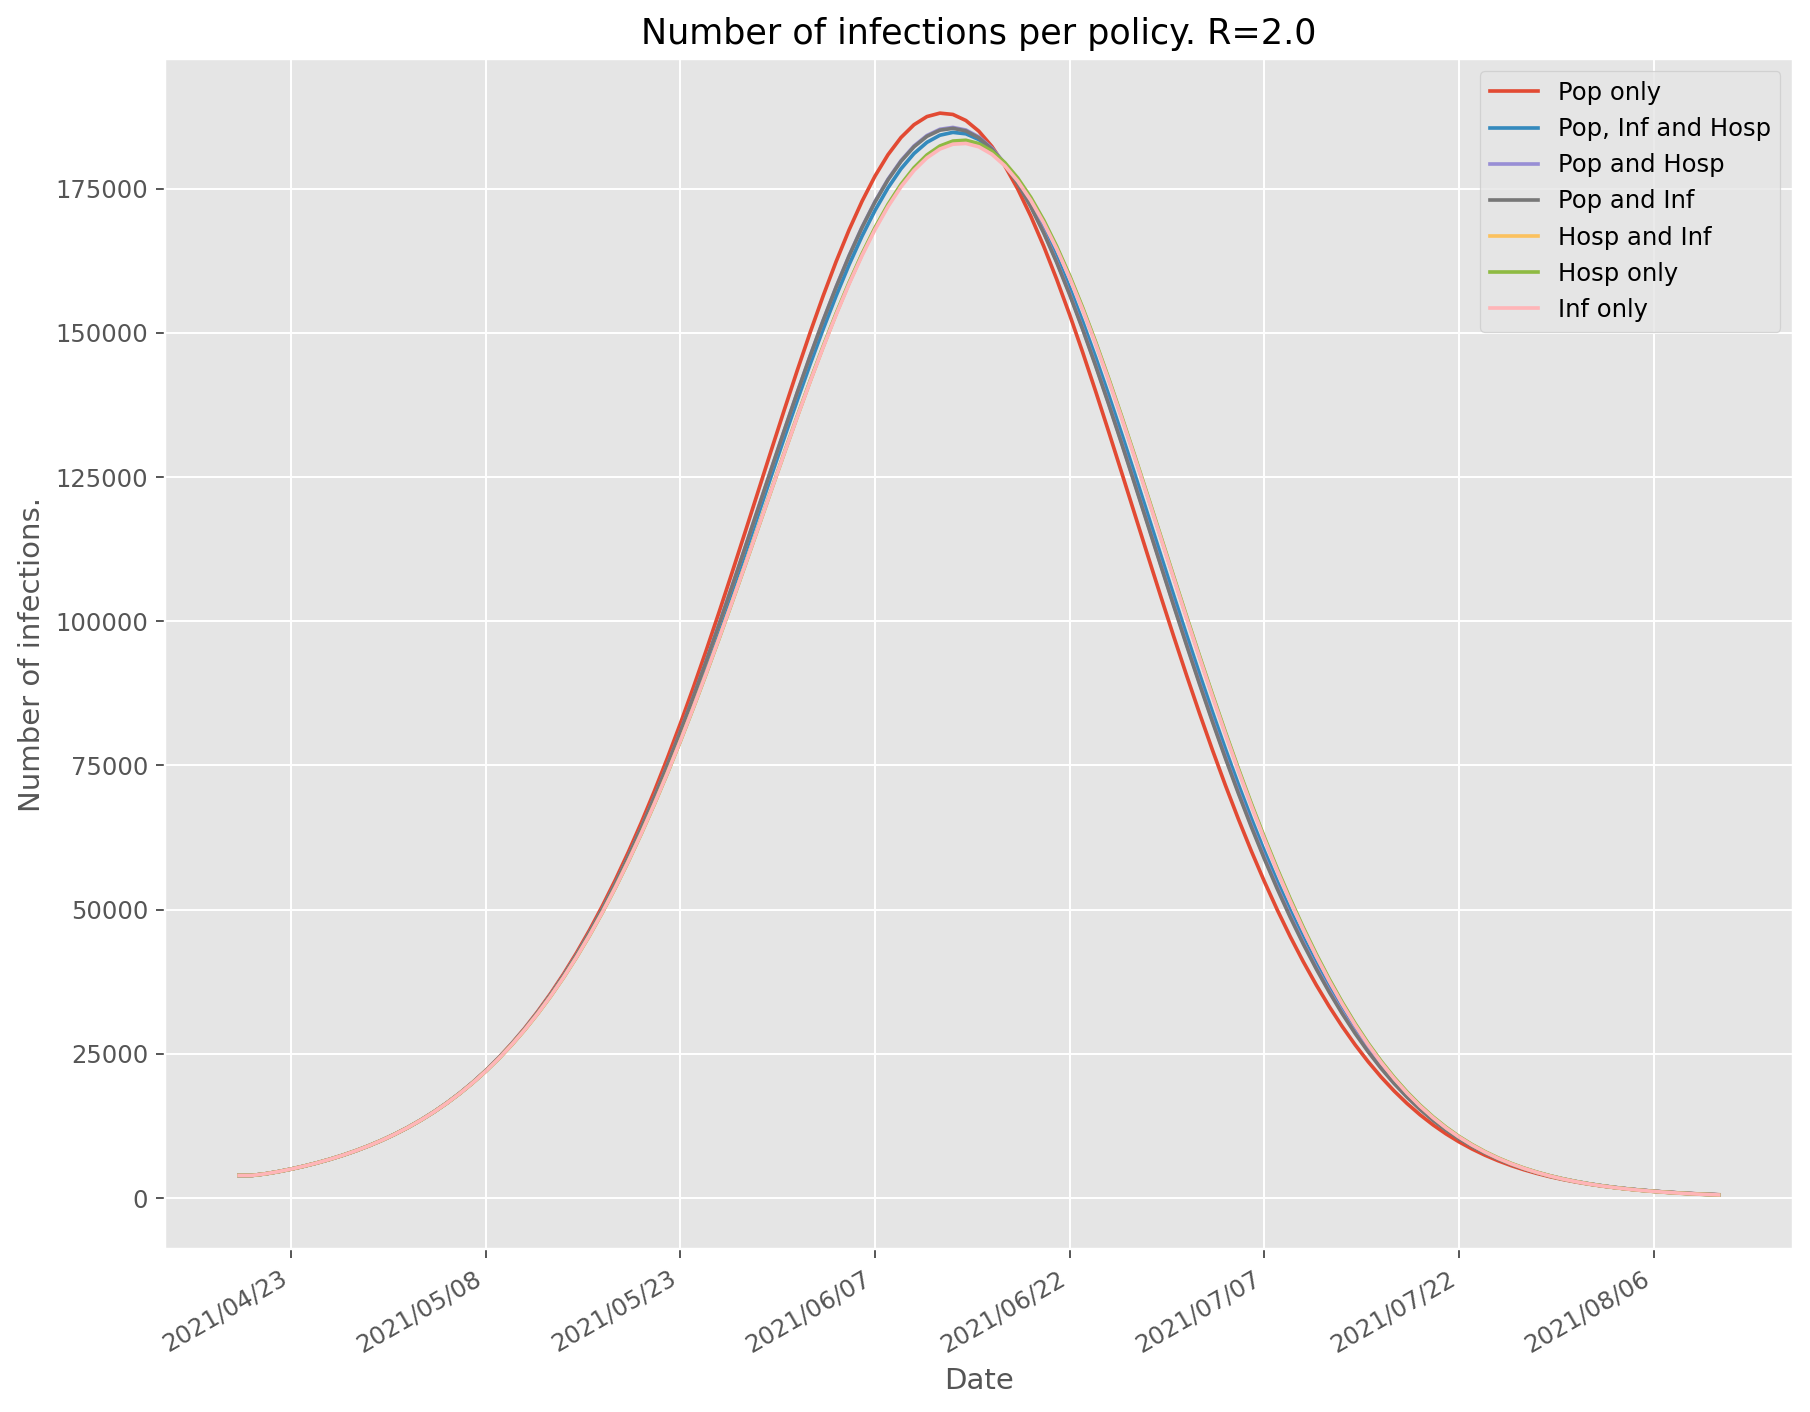

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()